# Advance Regression


<span style="color: green; font-size: 25px;"> Surprise Housing Decision to Enter in  Australian market<br><br>

# Problem Statment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.


The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:

<span style="color: red; font-size: 15px;"><b> - Which variables are significant in predicting the price of a house, and <br>
<span style="color: red; font-size: 15px;"><b> - How well those variables describe the price of a house.<br>
<span style="color: red; font-size: 15px;"><b> - Also, determine the optimal value of lambda for ridge and lasso regression.<br>

# Business Goal:

Required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.
 

##  The Steps we are using as follows:
 1. Reading, Understaning The Data
 2. Visualising the Data
 
 3. Model Building, Tuning & Evaluation
     * Split the Data into Dependent and Independent variables
     * Train - Test Split
     * Scaling numerical columns
     Model 1: Ridge Regression
     Model 2: Lasso
 4. Inferences 

# STEP 1: Reading and Understanding the Data
   
<span style="color: blue; font-size: 18px;"> - Importing data using the pandas library  </span>   
<span style='color:blue; font-size: 18px;'> - Understanding the structure of the data  </span>   


In [1]:
# Importing the numpy, pandas and other packages

import numpy as np
import pandas as pd

# Ignore Warnings 
import warnings
warnings.filterwarnings('ignore')

# Packages for Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# For Train and Test the Data
import sklearn
from sklearn.model_selection import train_test_split

# for Ridge and Lasso 
from sklearn.linear_model import Ridge, Lasso


# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import os


# Evaluate test Data
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Read and Loading SurpriseHouse CSV file
SurpriseHouse = pd.read_csv("train_data.csv")
SurpriseHouse.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [3]:
# The number of rows and coloumns 
SurpriseHouse.shape

(1460, 81)

In [4]:
SurpriseHouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# List summary of all columns in dataset
SurpriseHouse.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

The category columns below have one level NA, which pandas may mistakenly interpret as a missing value:-

##### Alley : NA = No alley access
##### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 : NA = No Basement
##### FireplaceQu : NA = No Fireplace
##### GarageType, GarageFinish, GarageQual, GarageCond : NA = No Garage
##### PoolQC : NA = No Pool
##### Fence : NA = No Fence
##### MiscFeature : NA = None

So, we will have to replace these by 'None' before finding missing values.

For this we will read the csv file again and set the parameter 'keep_default_na' to False

In [6]:
SurpriseHouse = pd.read_csv("train_data.csv", keep_default_na=False)
SurpriseHouse.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [7]:
## Replacing all 'NA' of all above mentioned columns by 'None'
SurpriseHouse[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = SurpriseHouse[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
SurpriseHouse.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave  None      Reg   
1   2          20       RL          80     9600   Pave  None      Reg   
2   3          60       RL          68    11250   Pave  None      IR1   
3   4          70       RL          60     9550   Pave  None      IR1   
4   5          60       RL          84    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [8]:
# Understand DataTypes of Columans 
SurpriseHouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

#### We find that the following column types need to be modified after examining the data types of every column and contrasting them with the data descriptions of each column: <b> <b>


<span style="color: Red; font-size: 16px;">
    &#8226; Columns MSSubClass, OverallQual, OverallCond need to be converted to object type <br>
    &#8226; Column LotFrontage and MasVnrArea needs to be converted to numeric type.
</span>



In [9]:
## Convert three columns to 'object' type as mentioned above
SurpriseHouse[['MSSubClass', 'OverallQual', 'OverallCond']] = SurpriseHouse[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [10]:
## Convert two columns to 'numeric' type as mentioned above
SurpriseHouse['LotFrontage'] = pd.to_numeric(SurpriseHouse['LotFrontage'], errors='coerce')
SurpriseHouse['MasVnrArea'] = pd.to_numeric(SurpriseHouse['MasVnrArea'], errors='coerce')

In [11]:
## Check whether the data types of five columns have changed
SurpriseHouse[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [12]:
## View the statistical description of the numerical columns
SurpriseHouse.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.00

Some variables, such as 2ndFlrSF, have skewed distributions because their means differ significantly from their median values.

In [13]:
#check missing percentage
percent_missing = (SurpriseHouse.isnull().sum() / SurpriseHouse.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(15)

LotFrontage     17.739726
MasVnrArea       0.547945
Id               0.000000
KitchenAbvGr     0.000000
GarageYrBlt      0.000000
GarageType       0.000000
FireplaceQu      0.000000
Fireplaces       0.000000
Functional       0.000000
TotRmsAbvGrd     0.000000
KitchenQual      0.000000
BedroomAbvGr     0.000000
GarageCars       0.000000
HalfBath         0.000000
FullBath         0.000000
dtype: float64

In [14]:
# Check null, missing values 
SurpriseHouse.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

- We will apply missing value treatment to LotFrontage and MasVnrArea, the only two columns that have missing values.


In [15]:
#Treaing missing values by imputing for columns with missing values

SurpriseHouse['LotFrontage']= SurpriseHouse.LotFrontage.fillna(SurpriseHouse.LotFrontage.median()) #Can see a presence of outlier so imputing the missing values through median
SurpriseHouse['MasVnrArea']= SurpriseHouse.MasVnrArea.fillna(SurpriseHouse.MasVnrArea.median())    # Can see presence of outlier


In [16]:
# Check null, missing values 
SurpriseHouse.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [17]:
[col for col in SurpriseHouse.columns if SurpriseHouse[col].isnull().any()]

[]

In [18]:
# Cases when the house doesn't have the garrage so replacing None with No Garrage according to Disctonary

SurpriseHouse['GarageType'] = SurpriseHouse['GarageType'].apply(lambda x: 'No Garage' if x == 'None' else x)
SurpriseHouse['GarageFinish'] = SurpriseHouse['GarageFinish'].apply(lambda x: 'No Garage' if x == 'None' else x)
SurpriseHouse['GarageCond'] = SurpriseHouse['GarageCond'].apply(lambda x: 'No Garage' if x == 'None' else x)
SurpriseHouse['GarageQual'] = SurpriseHouse['GarageQual'].apply(lambda x: 'No Garage' if x == 'None' else x)
#surp['MasVnrType'] = surp['MasVnrType'].replace(np.nan, 'None') # replacing nan with the top option of this field
SurpriseHouse['Electrical'] = SurpriseHouse['Electrical'].apply(lambda x: 'SBrkr' if x == 'None' else x)

In [19]:
#changing num to categorical so as to form these as dummy variables 
SurpriseHouse['MSSubClass']= SurpriseHouse['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

SurpriseHouse['OverallQual']=SurpriseHouse['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
SurpriseHouse['OverallCond']=SurpriseHouse['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [20]:
# Cases when the house doesn't have the basement so replacing null with No Basement

SurpriseHouse['BsmtExposure'] = SurpriseHouse['BsmtExposure'].apply(lambda x: 'No Basement' if x == 'None' else x)
SurpriseHouse['BsmtFinType2'] = SurpriseHouse['BsmtFinType2'].apply(lambda x: 'No Basement' if x == 'None' else x)
SurpriseHouse['BsmtFinType1'] = SurpriseHouse['BsmtFinType1'].apply(lambda x: 'No Basement' if x == 'None' else x)
SurpriseHouse['BsmtCond'] = SurpriseHouse['BsmtCond'].apply(lambda x: 'No Basement' if x == 'None' else x)
SurpriseHouse['BsmtQual'] = SurpriseHouse['BsmtQual'].apply(lambda x: 'No Basement' if x == 'None' else x)

In [21]:
SurpriseHouse.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0  None      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1  None      Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2  None      IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3  None      IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4  None      IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType HouseStyle    OverallQual OverallCond  \
0       Norm       Norm     1Fam     2Story           Good     Average   
1      Feedr       Norm     1Fam     1Story  Above Average   Very Good   
2       Norm       Norm     1Fam     2Story           Good     Average   
3       Norm       Norm     1Fam     2Story           Good     Average   
4       Norm       Norm     1Fam     2Story      Very Good     Average   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1  

In [22]:
# # Find columns with 'None' values
columns_with_none = [col for col in SurpriseHouse.columns if 'None' in SurpriseHouse[col].values]
columns_with_none

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [23]:
# # Calculate percentage of 'None' values in each column
none_percentage = (SurpriseHouse.applymap(lambda x: 1 if x == 'None' else 0).mean() * 100).round(2)
none_percentage

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.00
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType       59.18
MasVnrArea        0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.00
1stFlrSF   

In [24]:
# # Dropping Columns with high None values ,above 40%

SurpriseHouse.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',],axis=1,inplace=True)

#### Every missing value has now been addressed.

In [25]:
#Let's check the dependent variable i.e SalePrice

#descriptive statistics summary
SurpriseHouse['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

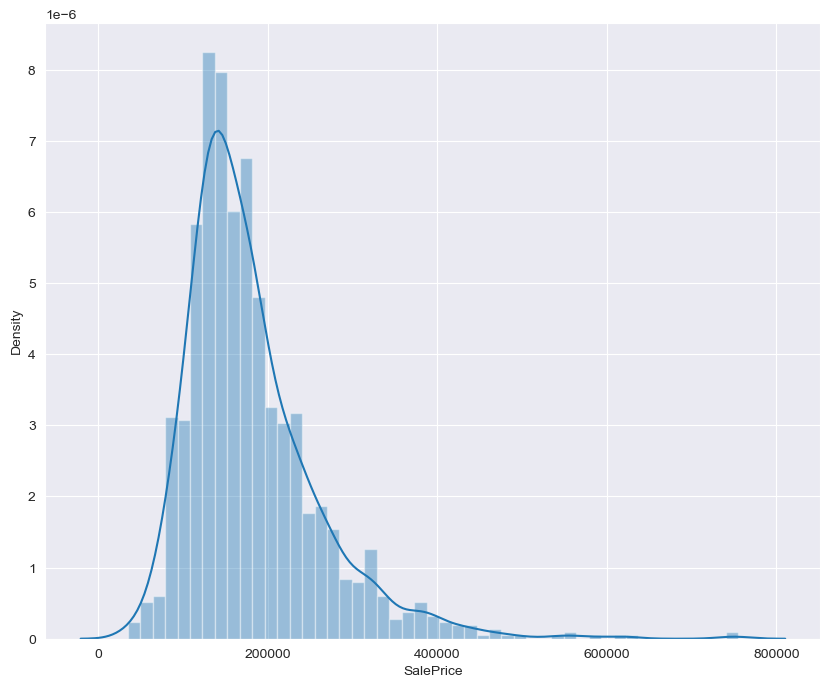

In [26]:
## First let's analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(SurpriseHouse['SalePrice']);

##### If you see above plot, Target Variable 'SalePrice' right skewed

In [27]:
## Check the skewness of target variable
SurpriseHouse['SalePrice'].skew()

1.8828757597682129

#### The target variable is highly skewed since the skewness is greater than 1.

In [28]:
## Check the kurtosis of target variable
SurpriseHouse['SalePrice'].kurt()

6.536281860064529

#### Since the kurtosis is more than 1, the target variable's distribution is significantly peaked.

<span style="color: red; font-size: 18px;"><b> So, we will log transform our target variable


In [29]:
#tranforming to form normal disribution
SurpriseHouse['SalePrice']=np.log(SurpriseHouse.SalePrice) 

In [30]:
## Check the skewness of target variable again
print("Skewness: ", SurpriseHouse['SalePrice'].skew())
## Check the kurtosis of target variable again
print("Kurtosis: ", SurpriseHouse['SalePrice'].kurt())

Skewness:  0.12133506220520406
Kurtosis:  0.8095319958036296


<span style="color: green; font-size: 18px;"><b> Both skewness and kurtosis are less than 1 now

In [31]:
SurpriseHouse['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

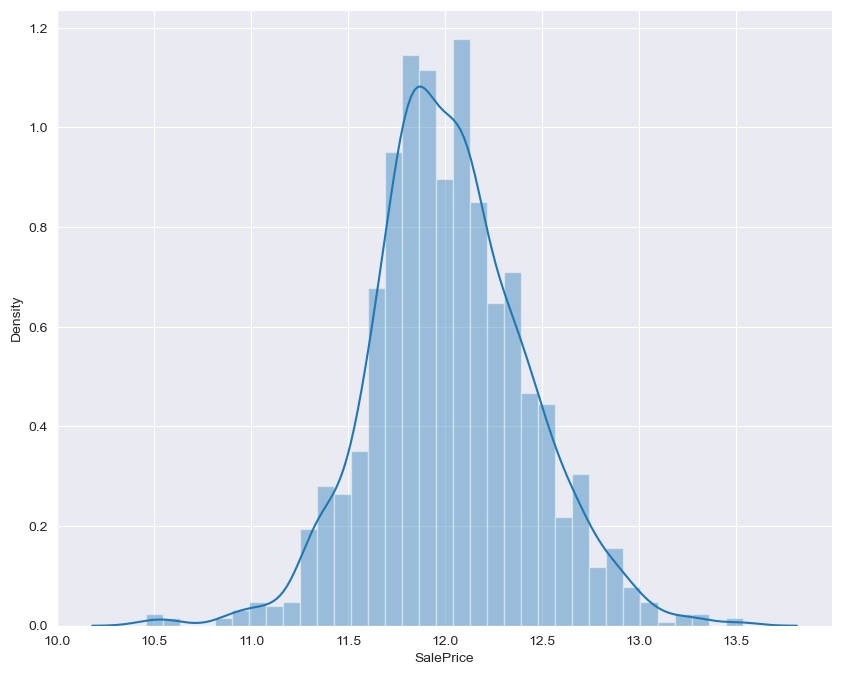

In [32]:
##  analyse the target variable 'SalePrice'
plt.figure(figsize=[10,8])
sns.set_style('darkgrid')
sns.distplot(SurpriseHouse['SalePrice']);

<span style="color: green; font-size: 15px;"><b> Target Variable 'Sale Price' is Normally distributed now

# STEP 2: Visualising the Data


- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [33]:
## Divide the dataframe df into numerical and categorical columns for EDA

## Extract numerical columns
cont_cols = SurpriseHouse.select_dtypes(include=['int64', 'float64'])
cont_cols.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2         548           0   
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247694  
1       5    2007  12.109011  
2       9    2008  12.317167  
3       2    2006  11.849398  
4      12    2008  12.429216

In [34]:
## Extract numerical columns - # Continuous Variables
cont_cols = SurpriseHouse.select_dtypes(include=['int64', 'float64'])
cont_cols.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [35]:
## Extract categorical columns
cat_cols = SurpriseHouse.select_dtypes(include='object')
cat_cols.head()

MSSubClass MSZoning Street LotShape LandContour  \
0             2-STORY 1946 & NEWER       RL   Pave      Reg         Lvl   
1  1-STORY 1946 & NEWER ALL STYLES       RL   Pave      Reg         Lvl   
2             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   
3             2-STORY 1945 & OLDER       RL   Pave      IR1         Lvl   
4             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle    OverallQual OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story           Good     Average     Gable  CompShg     VinylSd   
1     1Story  Above Average   Very Good     Gable  CompShg     MetalSd   
2     2Story           Good     Average     Gable  CompShg     VinylSd   
3     2Story           Good     Average     Gable  CompShg     Wd Sdng   
4     2Story      Very Good     Average     Gable  CompShg     VinylSd   

  Exterior2nd ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     VinylSd        Gd        TA      PConc       Gd       TA           No   
1     MetalSd        TA        TA     CBlock       Gd       TA           Gd   
2     VinylSd        Gd        TA      PConc       Gd       TA           Mn   
3     Wd Shng        TA        TA     BrkTil       TA       Gd           No   
4     VinylSd        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional GarageType GarageYrBlt GarageFinish GarageQual  \
0          Gd        Typ     Attchd        2003          RFn         TA   
1          TA        Typ     Attchd        1976          RFn         TA   
2          Gd        Typ     Attchd        2001          RFn         TA   
3          Gd        Typ     Detchd        1998          Unf         TA   
4          Gd        Typ     Attchd        2000          RFn         TA   

  GarageCond PavedDrive SaleType SaleCondition  
0         TA          Y       WD        Normal  
1         TA          Y       WD        Normal  
2         TA          Y       WD        Normal  
3         TA          Y       WD       Abnorml  
4         TA          Y       WD        Normal

In [36]:
## Extract numerical columns - # Continuous Variables
cat_cols = SurpriseHouse.select_dtypes(include='object')
cat_cols.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

## Univariate Analysis

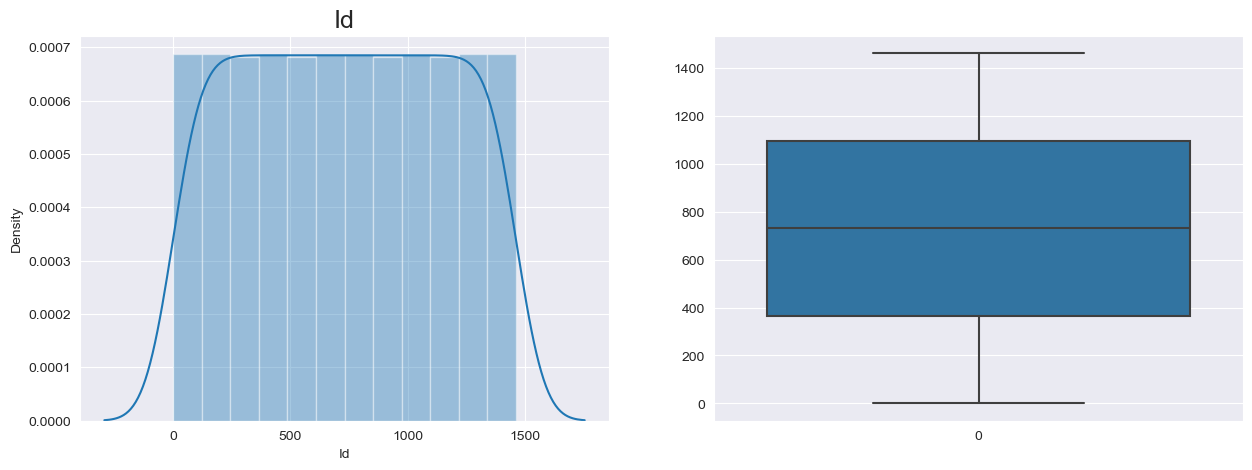

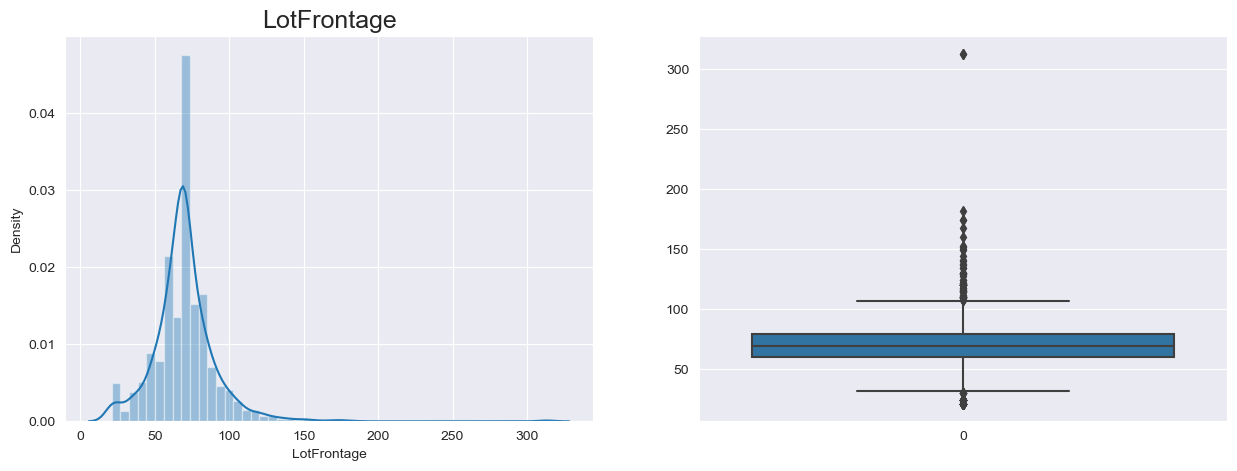

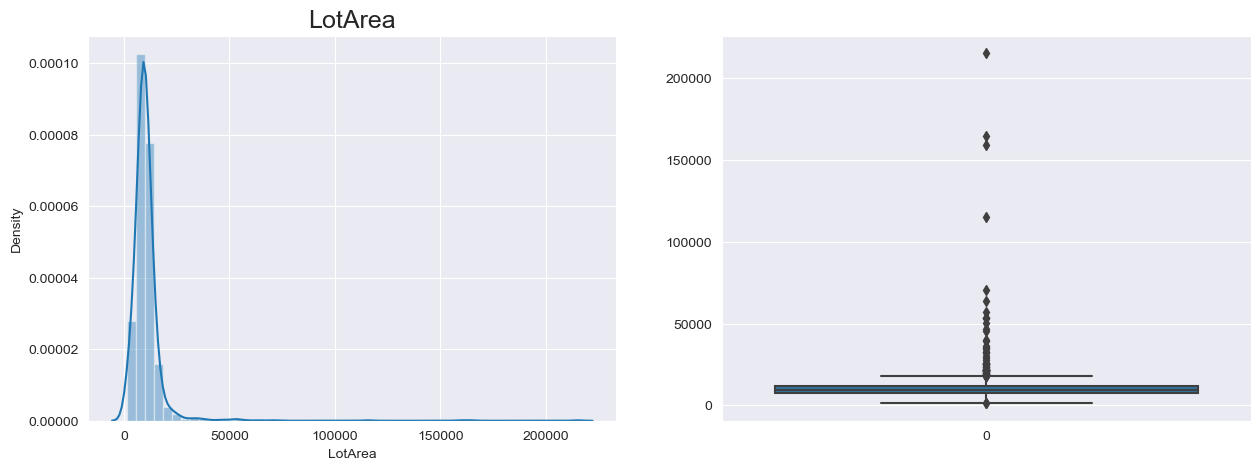

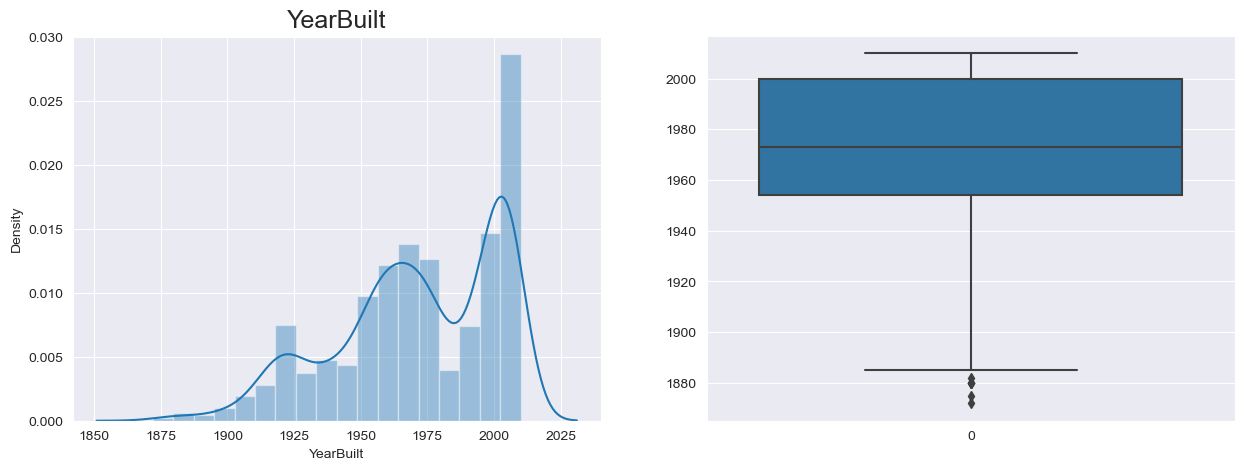

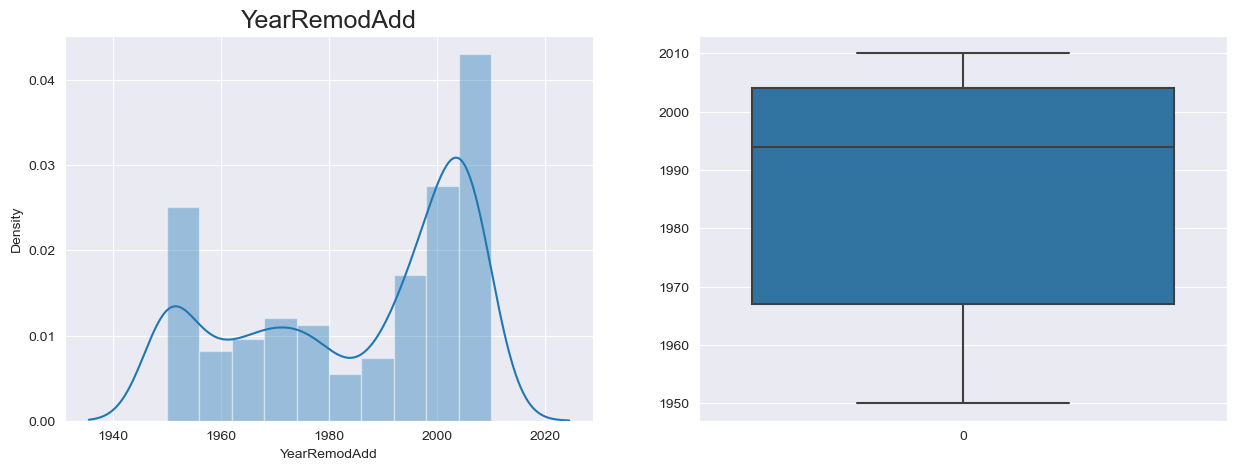

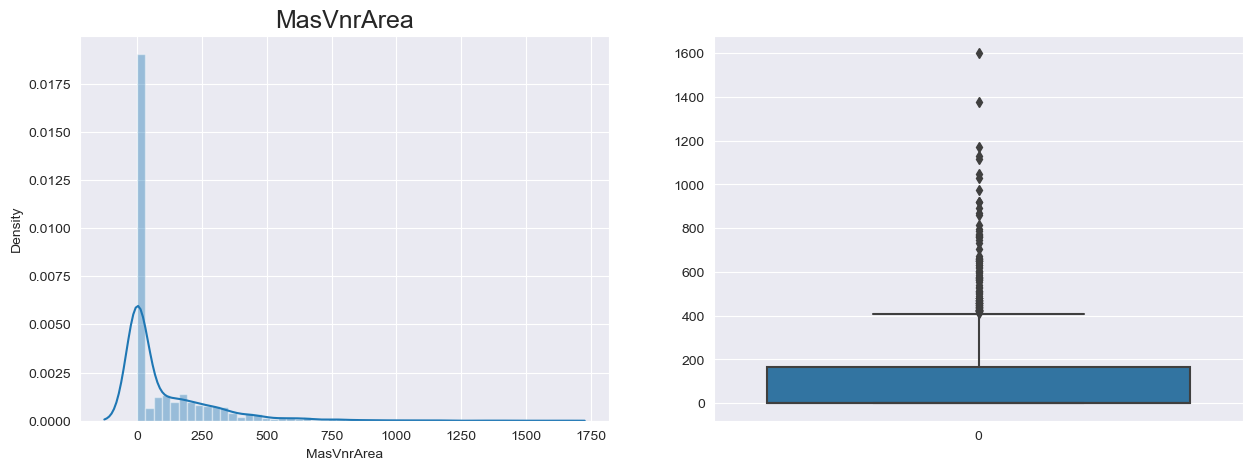

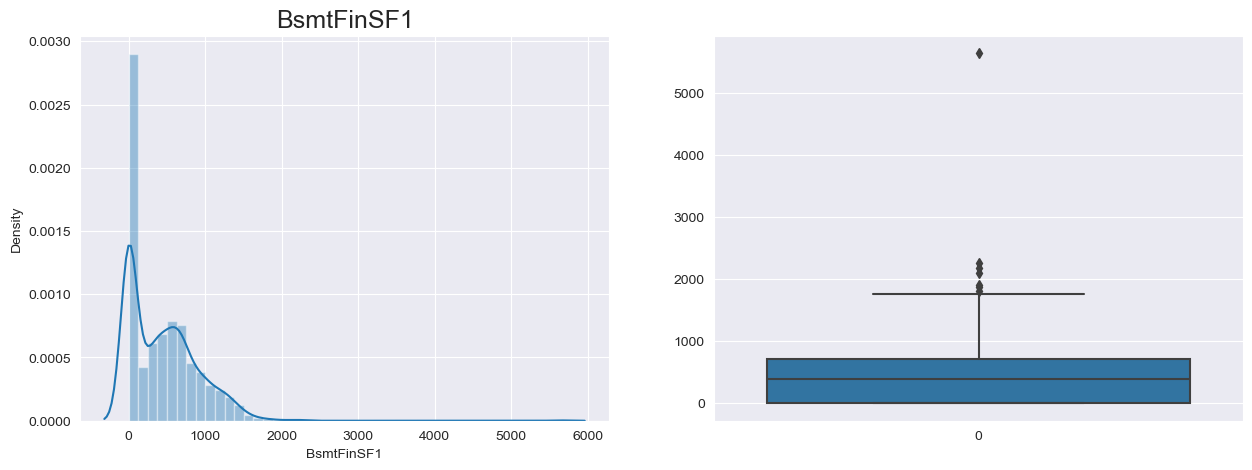

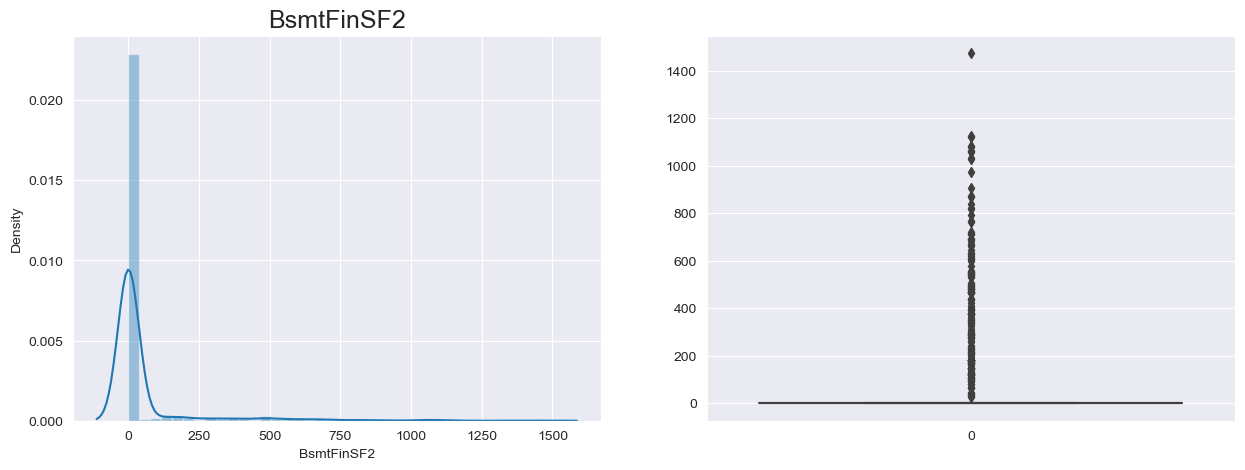

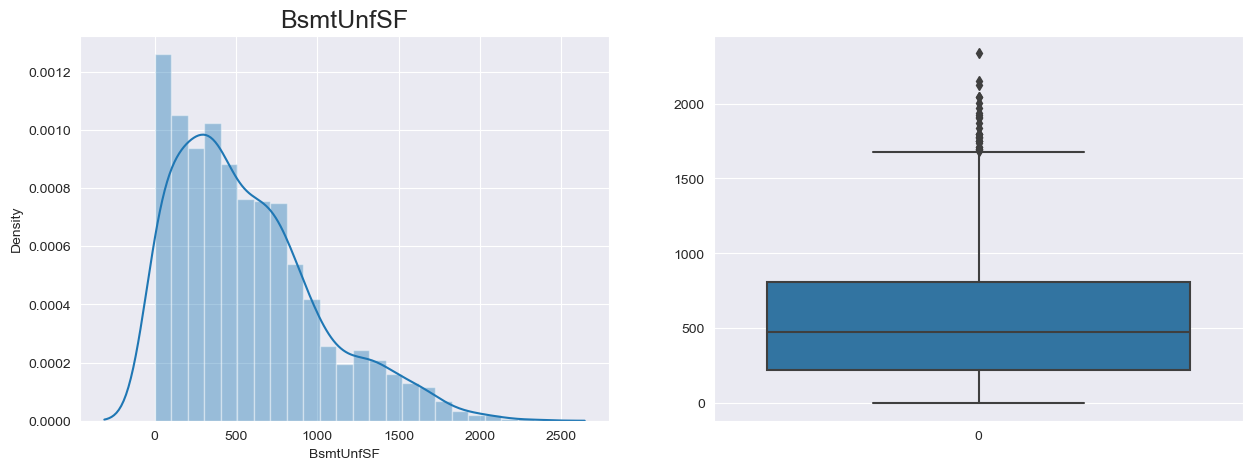

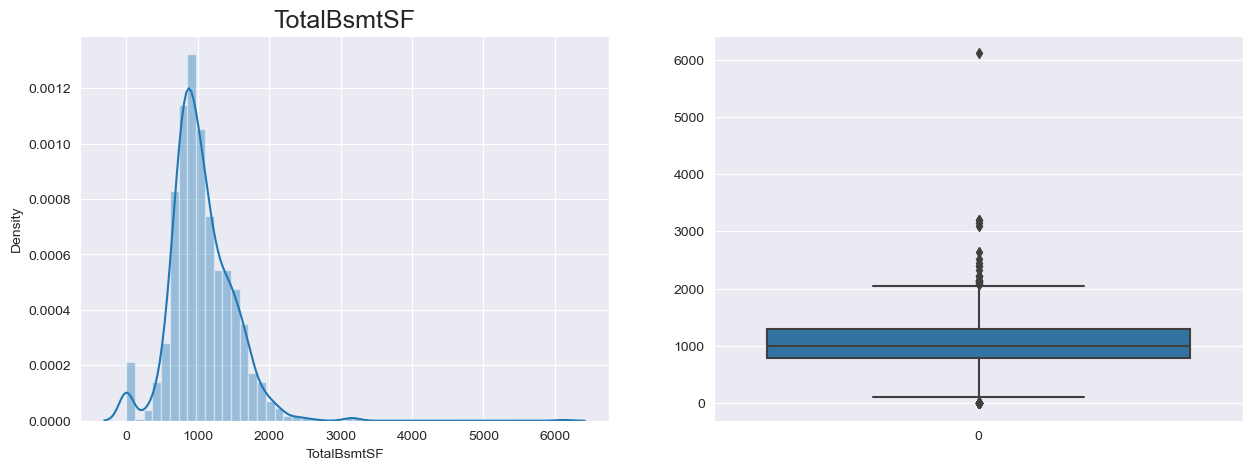

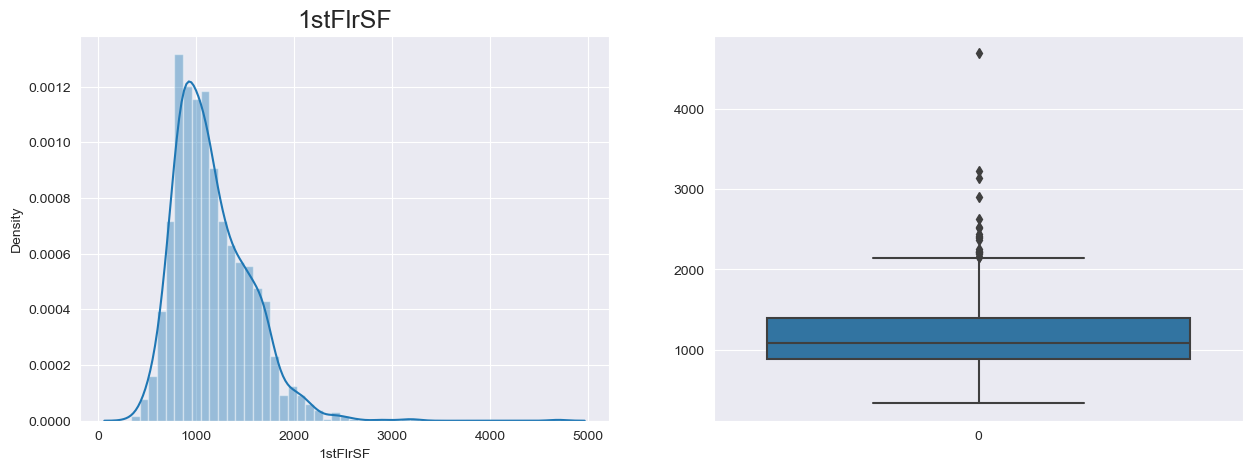

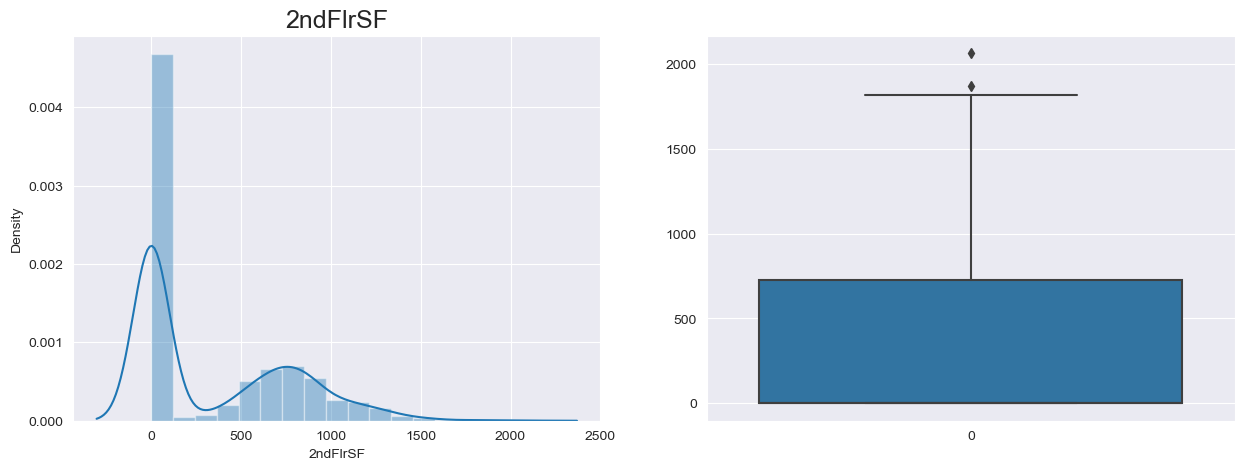

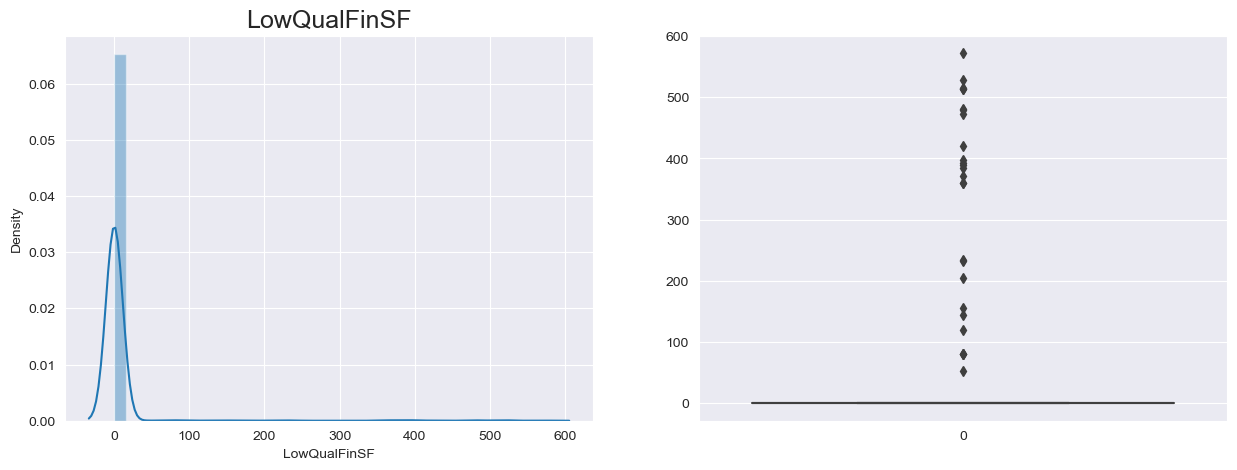

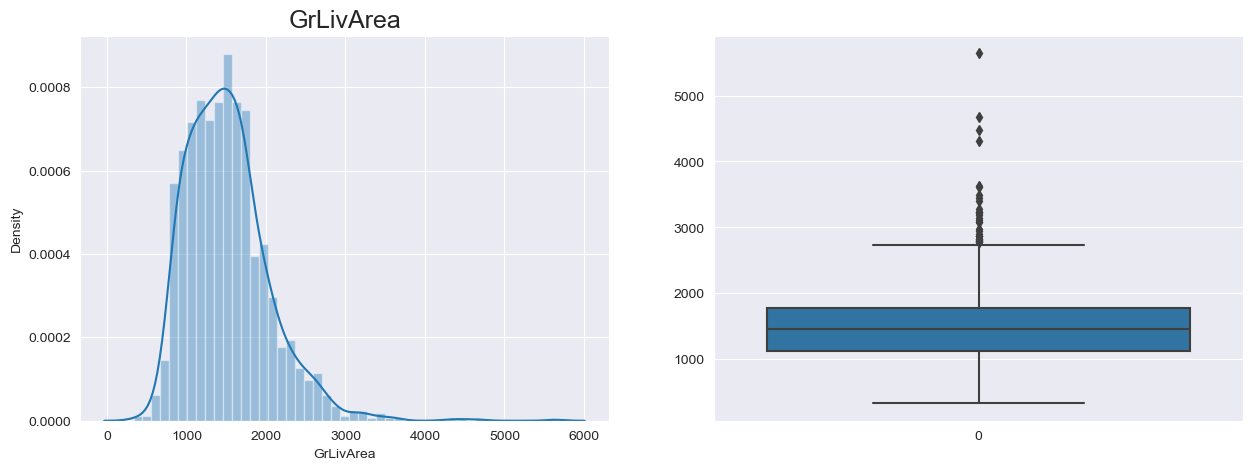

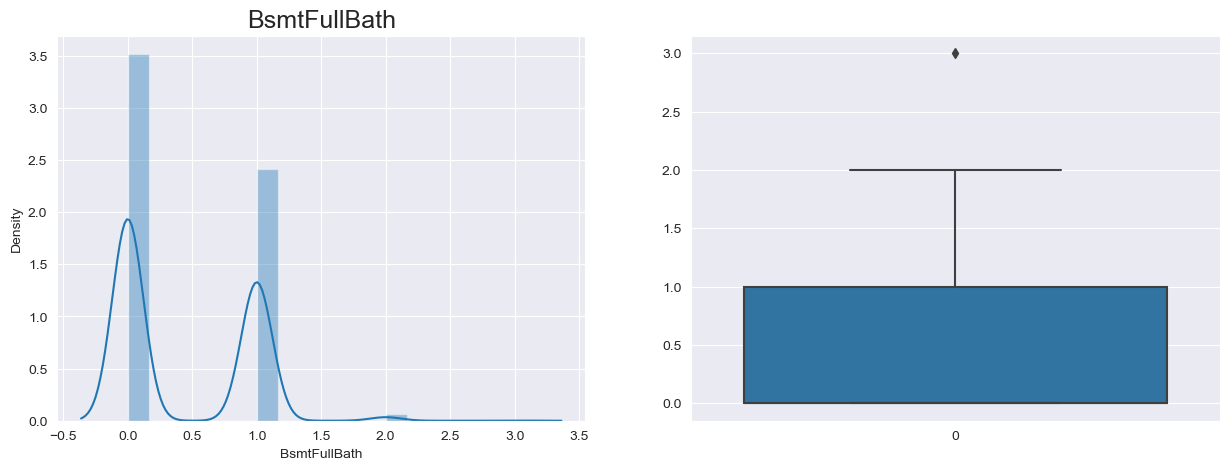

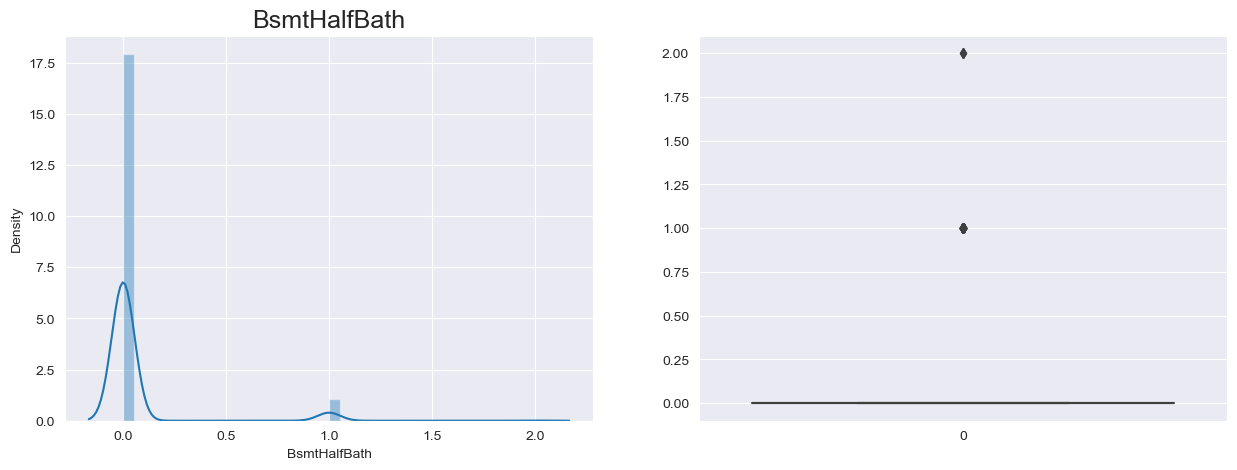

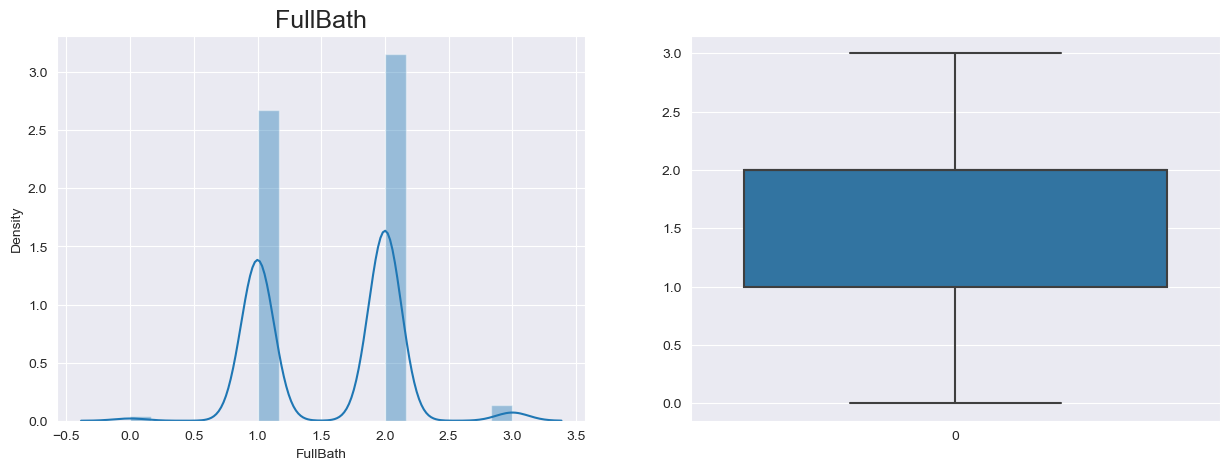

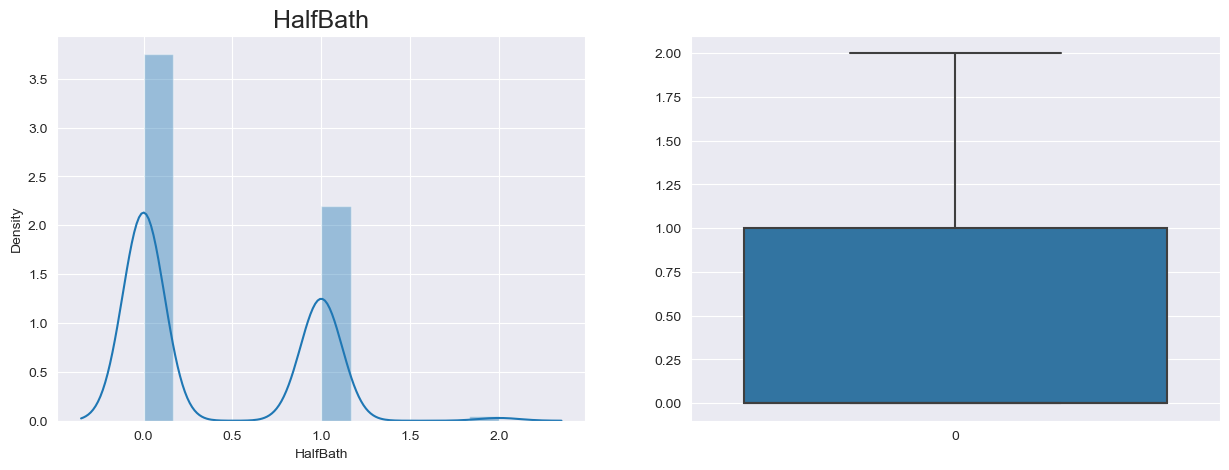

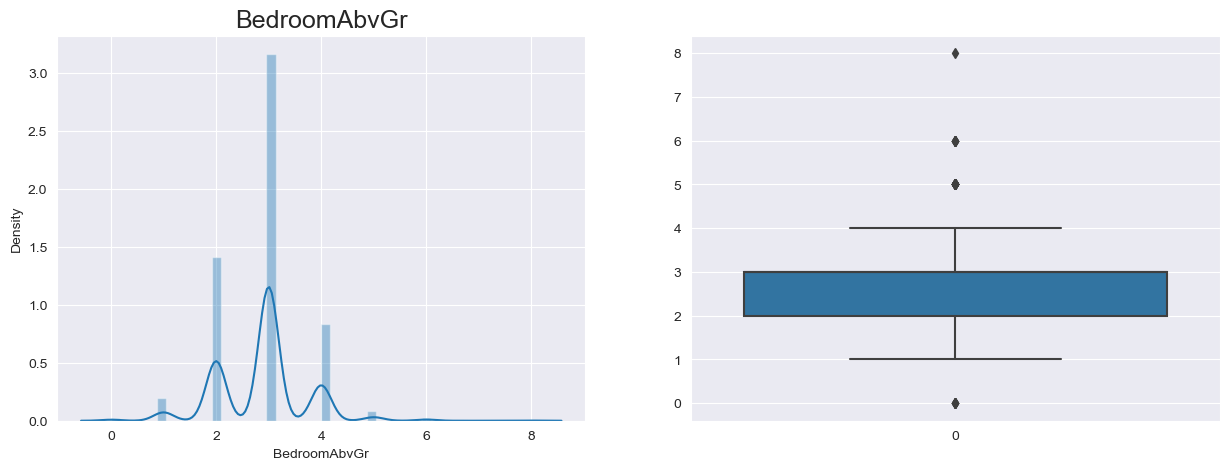

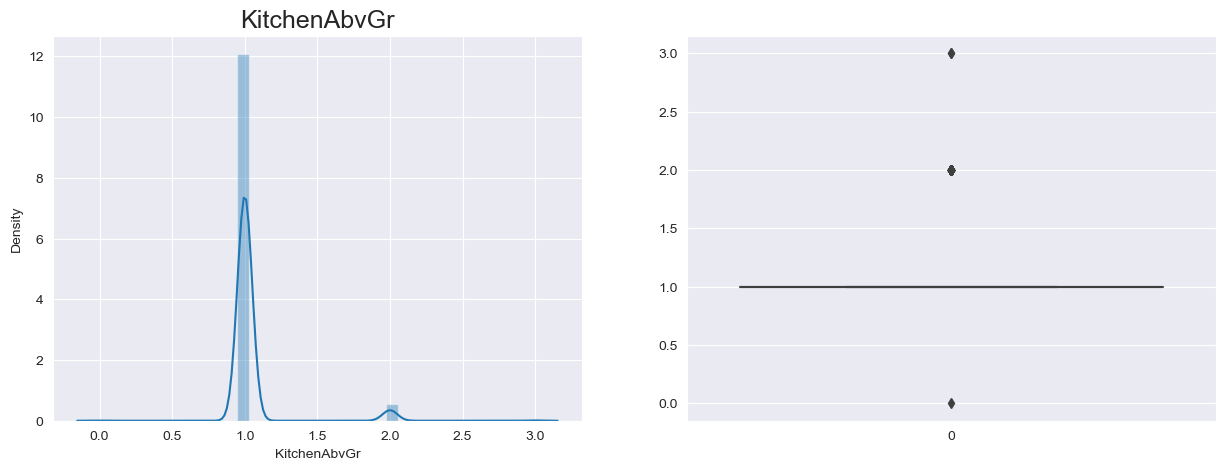

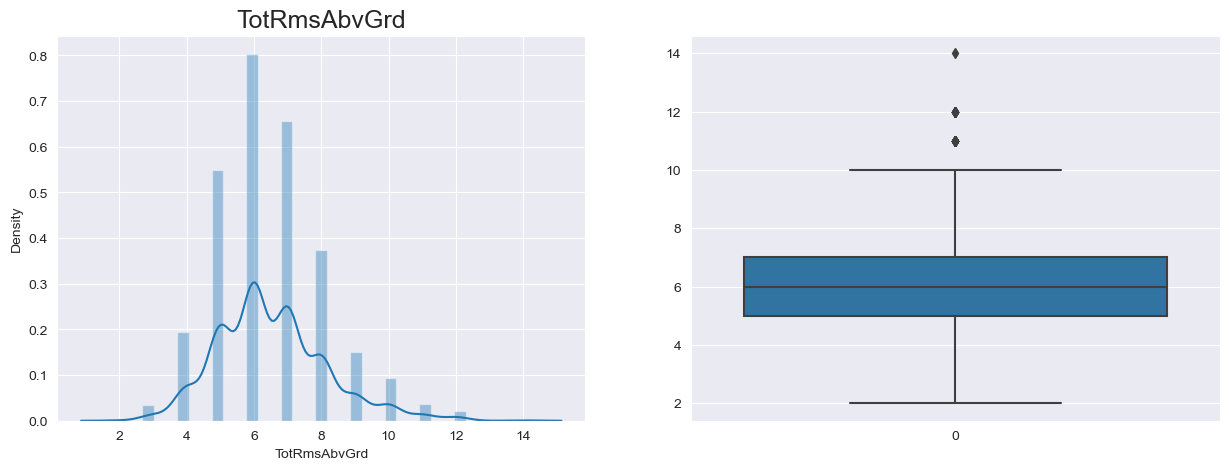

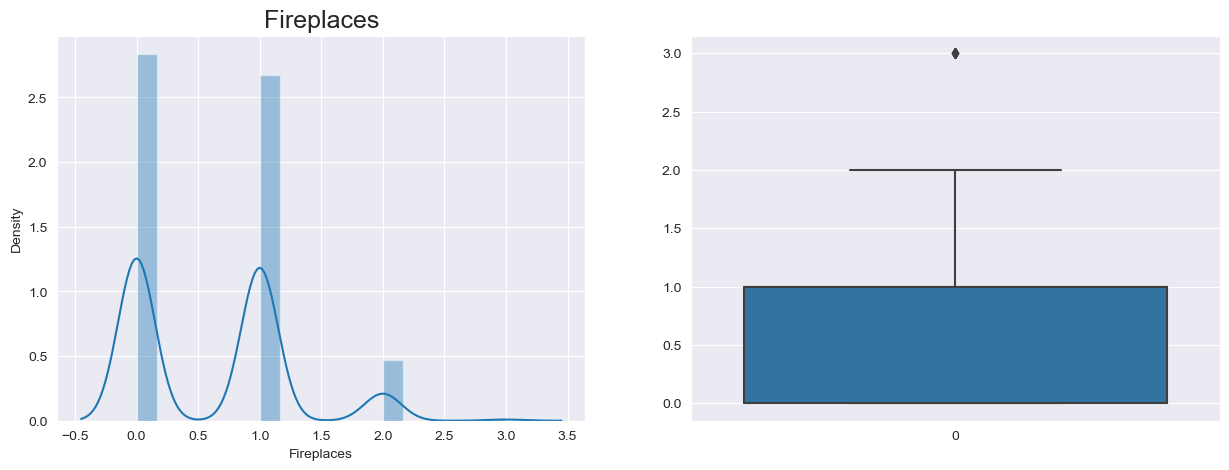

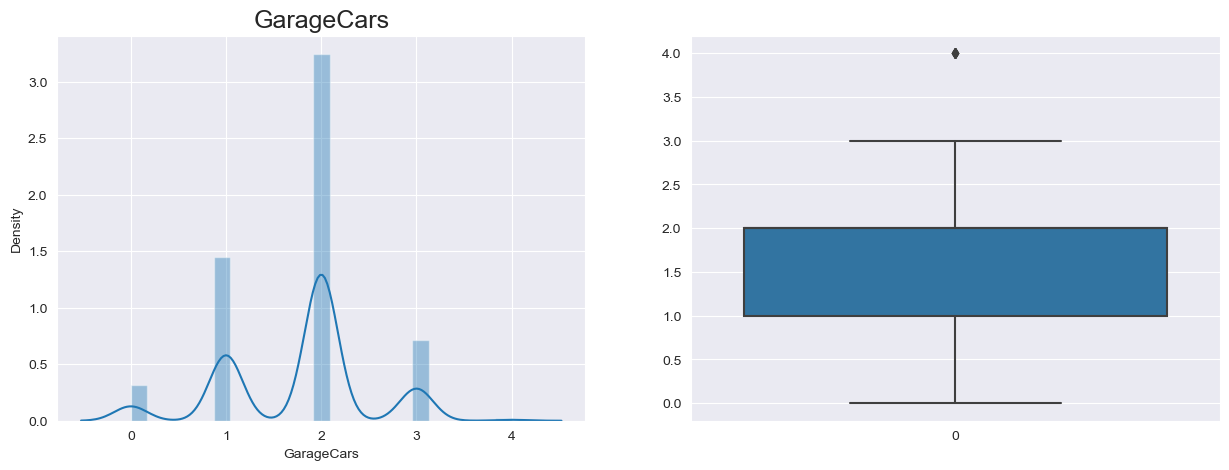

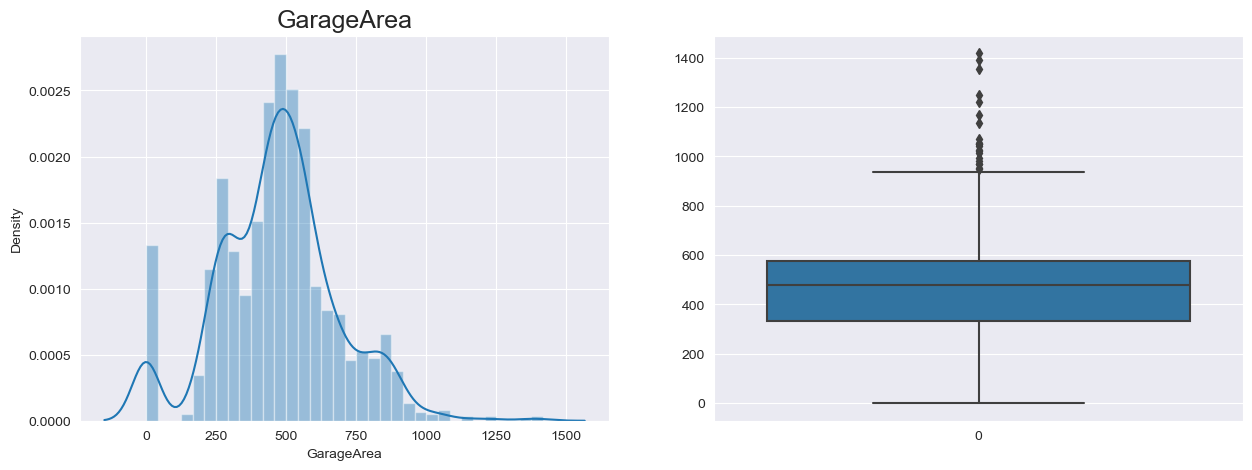

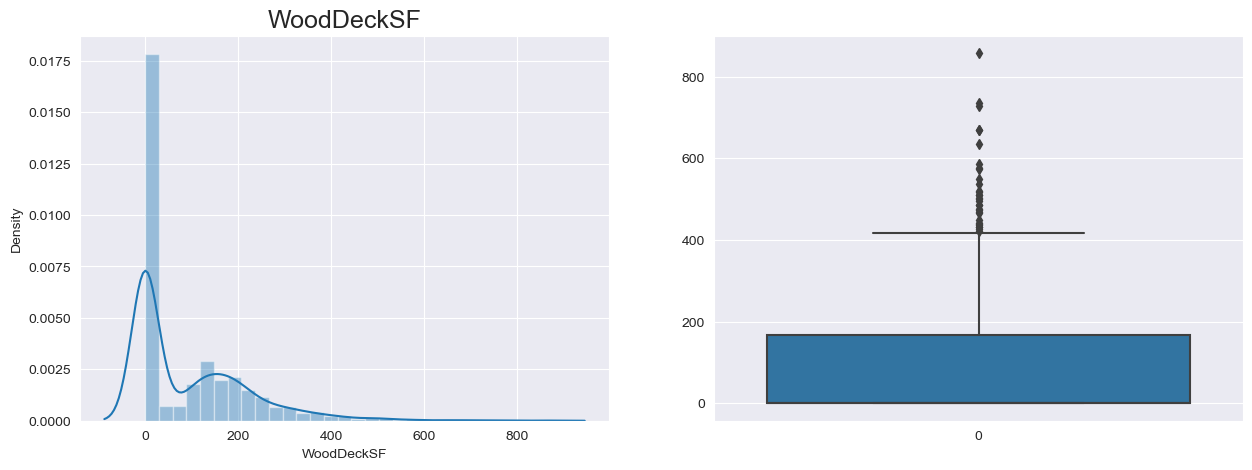

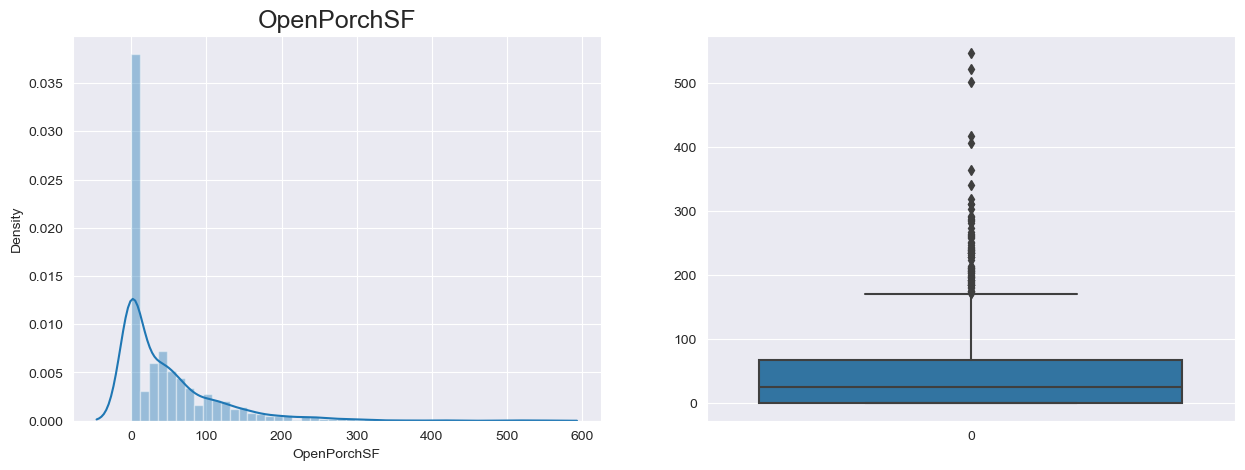

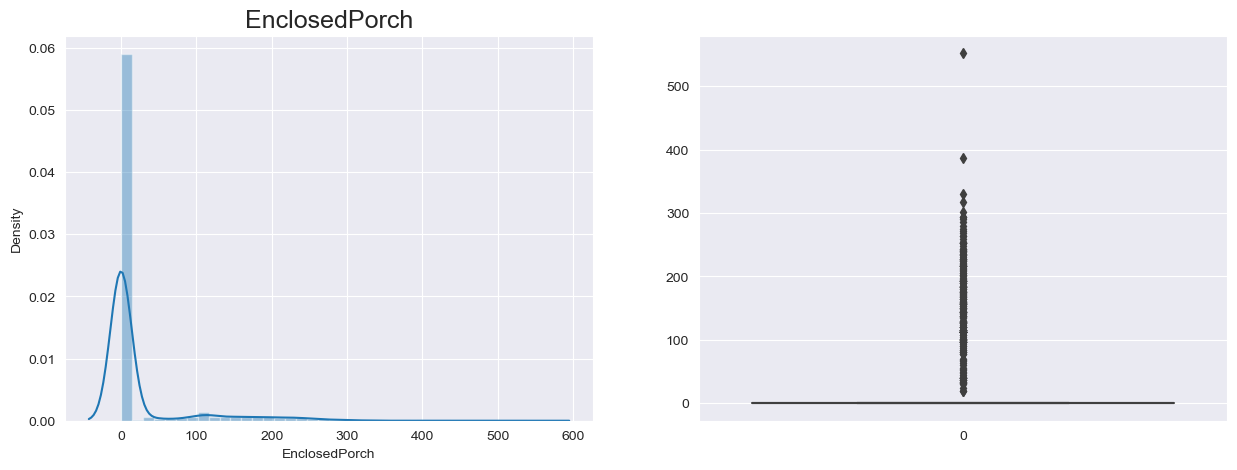

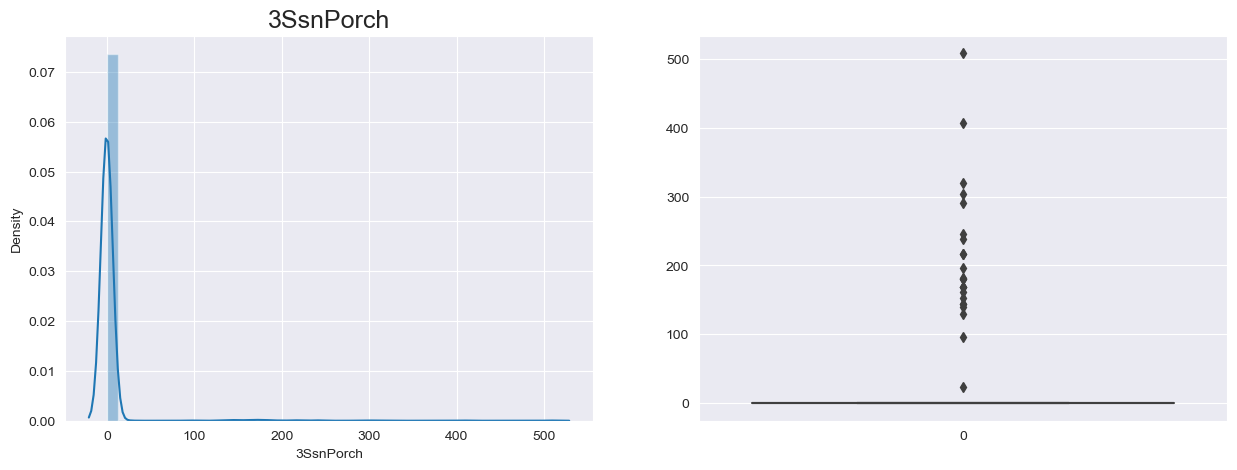

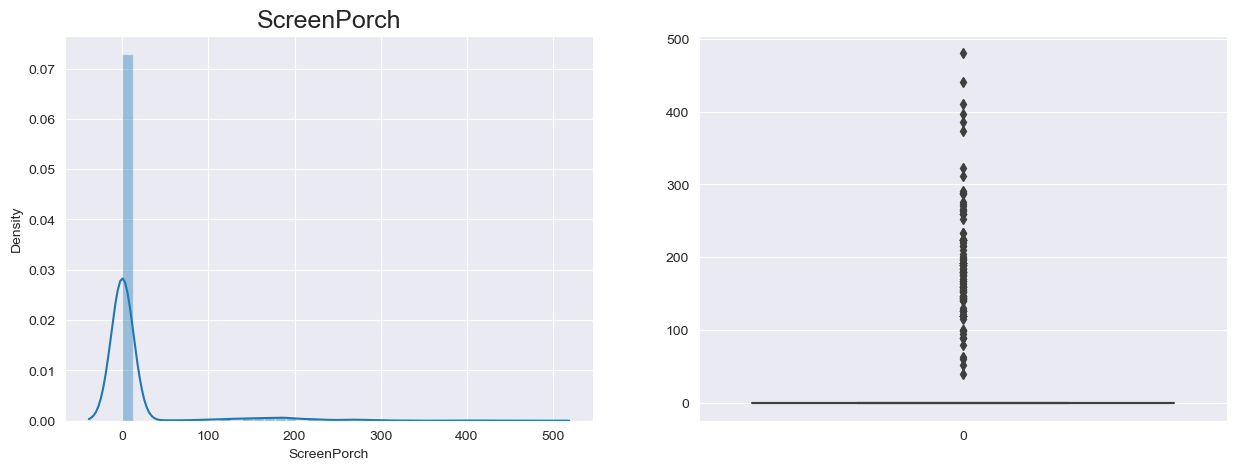

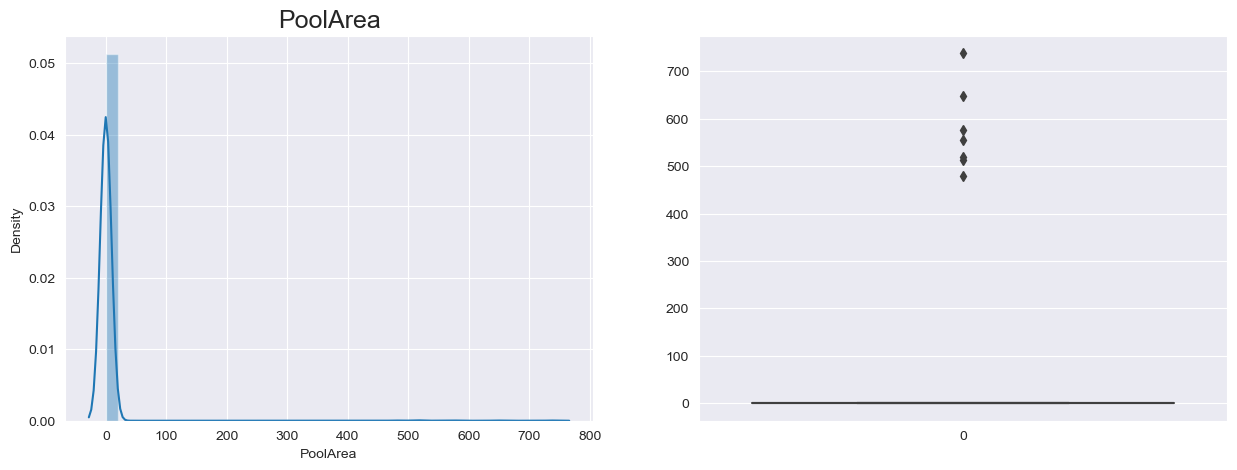

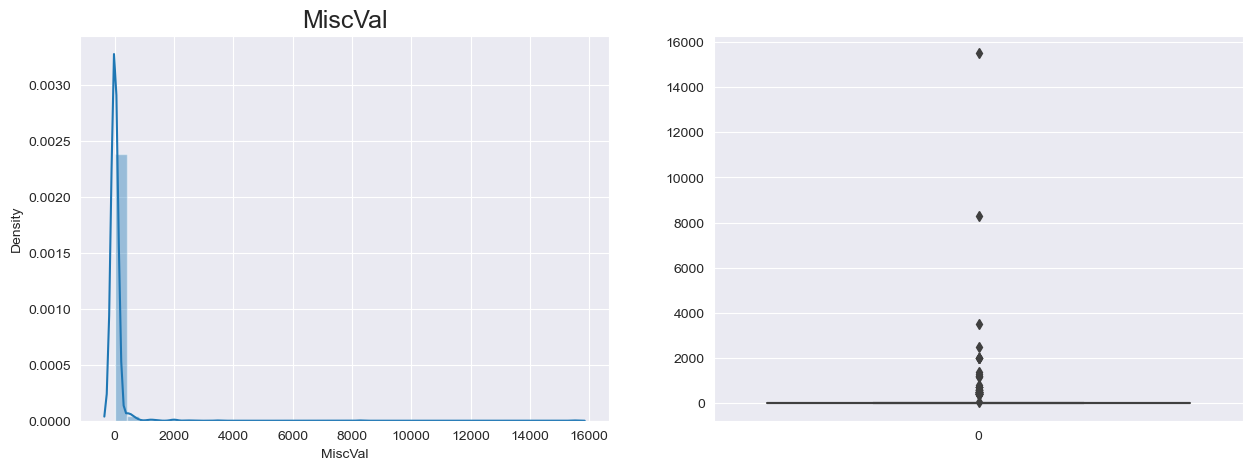

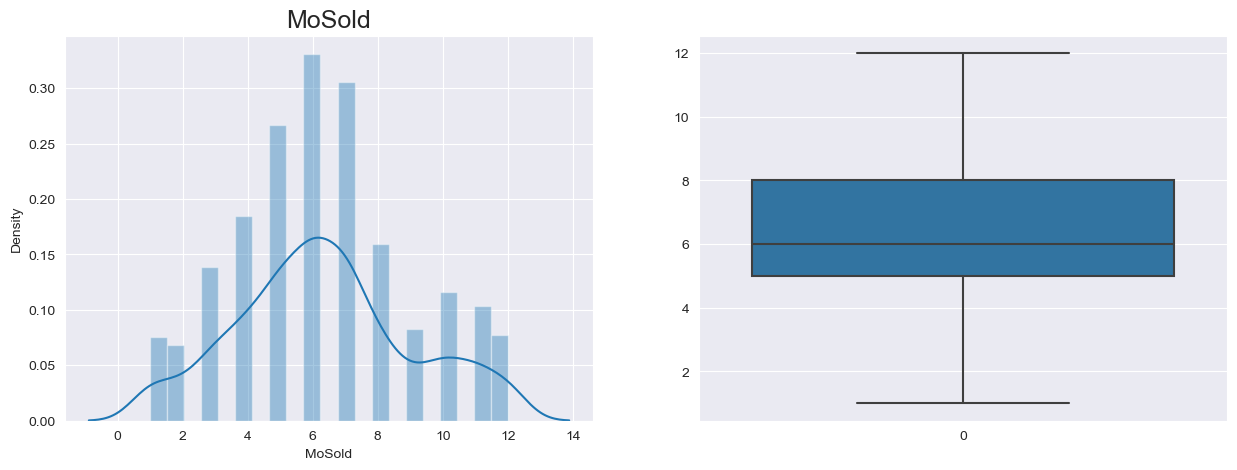

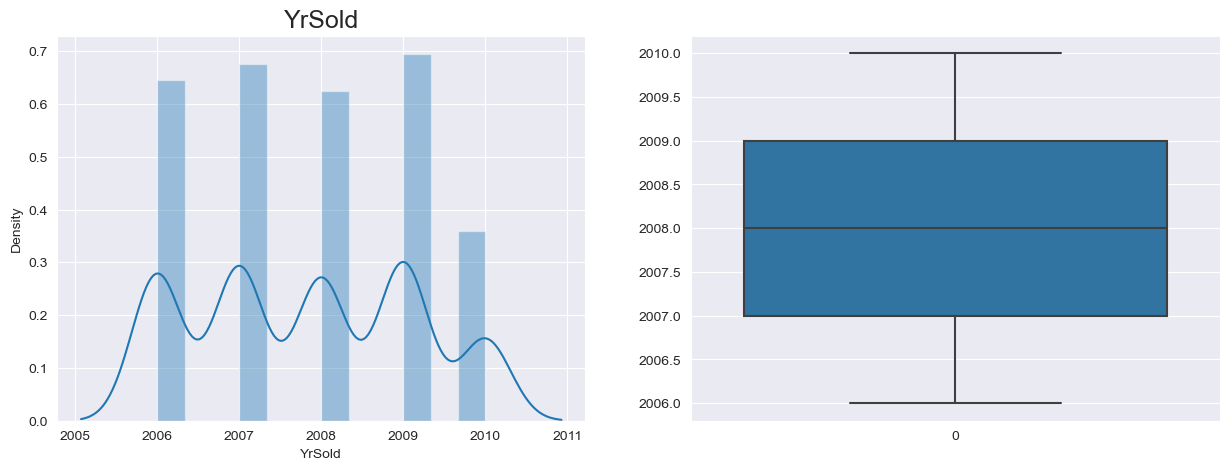

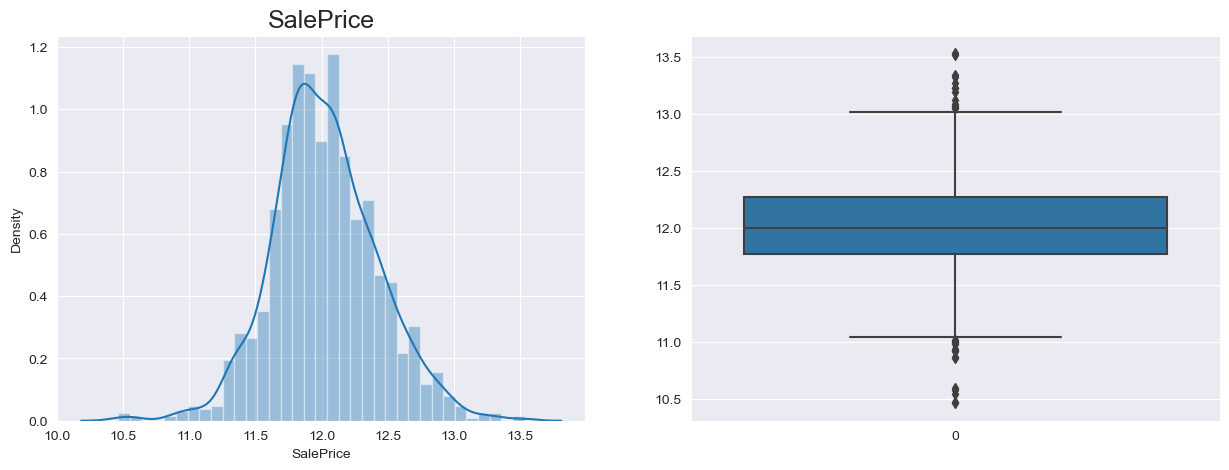

In [37]:

## View the distribution of all numeric variables using histograms and boxplots

for col in cont_cols.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(cont_cols[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(cont_cols[col])
    plt.show()    

- A large number of the numerical columns have a distribution that is not normal.
- There are outliers in most of the columns. Thus, we will need to use the Outlier treatment.

## Bivariate Analysis

In [38]:
## Extract categorical columns
cat_cols = SurpriseHouse.select_dtypes(include='object')
cat_cols.head()

MSSubClass MSZoning Street LotShape LandContour  \
0             2-STORY 1946 & NEWER       RL   Pave      Reg         Lvl   
1  1-STORY 1946 & NEWER ALL STYLES       RL   Pave      Reg         Lvl   
2             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   
3             2-STORY 1945 & OLDER       RL   Pave      IR1         Lvl   
4             2-STORY 1946 & NEWER       RL   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle    OverallQual OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story           Good     Average     Gable  CompShg     VinylSd   
1     1Story  Above Average   Very Good     Gable  CompShg     MetalSd   
2     2Story           Good     Average     Gable  CompShg     VinylSd   
3     2Story           Good     Average     Gable  CompShg     Wd Sdng   
4     2Story      Very Good     Average     Gable  CompShg     VinylSd   

  Exterior2nd ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     VinylSd        Gd        TA      PConc       Gd       TA           No   
1     MetalSd        TA        TA     CBlock       Gd       TA           Gd   
2     VinylSd        Gd        TA      PConc       Gd       TA           Mn   
3     Wd Shng        TA        TA     BrkTil       TA       Gd           No   
4     VinylSd        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional GarageType GarageYrBlt GarageFinish GarageQual  \
0          Gd        Typ     Attchd        2003          RFn         TA   
1          TA        Typ     Attchd        1976          RFn         TA   
2          Gd        Typ     Attchd        2001          RFn         TA   
3          Gd        Typ     Detchd        1998          Unf         TA   
4          Gd        Typ     Attchd        2000          RFn         TA   

  GarageCond PavedDrive SaleType SaleCondition  
0         TA          Y       WD        Normal  
1         TA          Y       WD        Normal  
2         TA          Y       WD        Normal  
3         TA          Y       WD       Abnorml  
4         TA          Y       WD        Normal

In [39]:
## View the unique values of all Categorical columns
for col in cat_cols.columns:
    print(col)
    print(cat_cols[col].unique(), '\n')

MSSubClass
['2-STORY 1946 & NEWER' '1-STORY 1946 & NEWER ALL STYLES'
 '2-STORY 1945 & OLDER' '1-1/2 STORY FINISHED ALL AGES'
 '2 FAMILY CONVERSION - ALL STYLES AND AGES'
 '1-1/2 STORY - UNFINISHED ALL AGES' 'DUPLEX - ALL STYLES AND AGES'
 '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
 '1-STORY 1945 & OLDER' 'SPLIT FOYER' 'SPLIT OR MULTI-LEVEL'
 '2-STORY PUD - 1946 & NEWER' '2-1/2 STORY ALL AGES'
 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'
 '1-STORY W/FINISHED ATTIC ALL AGES'] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWIS

#### as we have many columns so let's make groups randomly and visualize them
#### we would be making two graphs to understand firstly the countplot and secondaly effect of that variable on dependent variable i.e. SalePrice

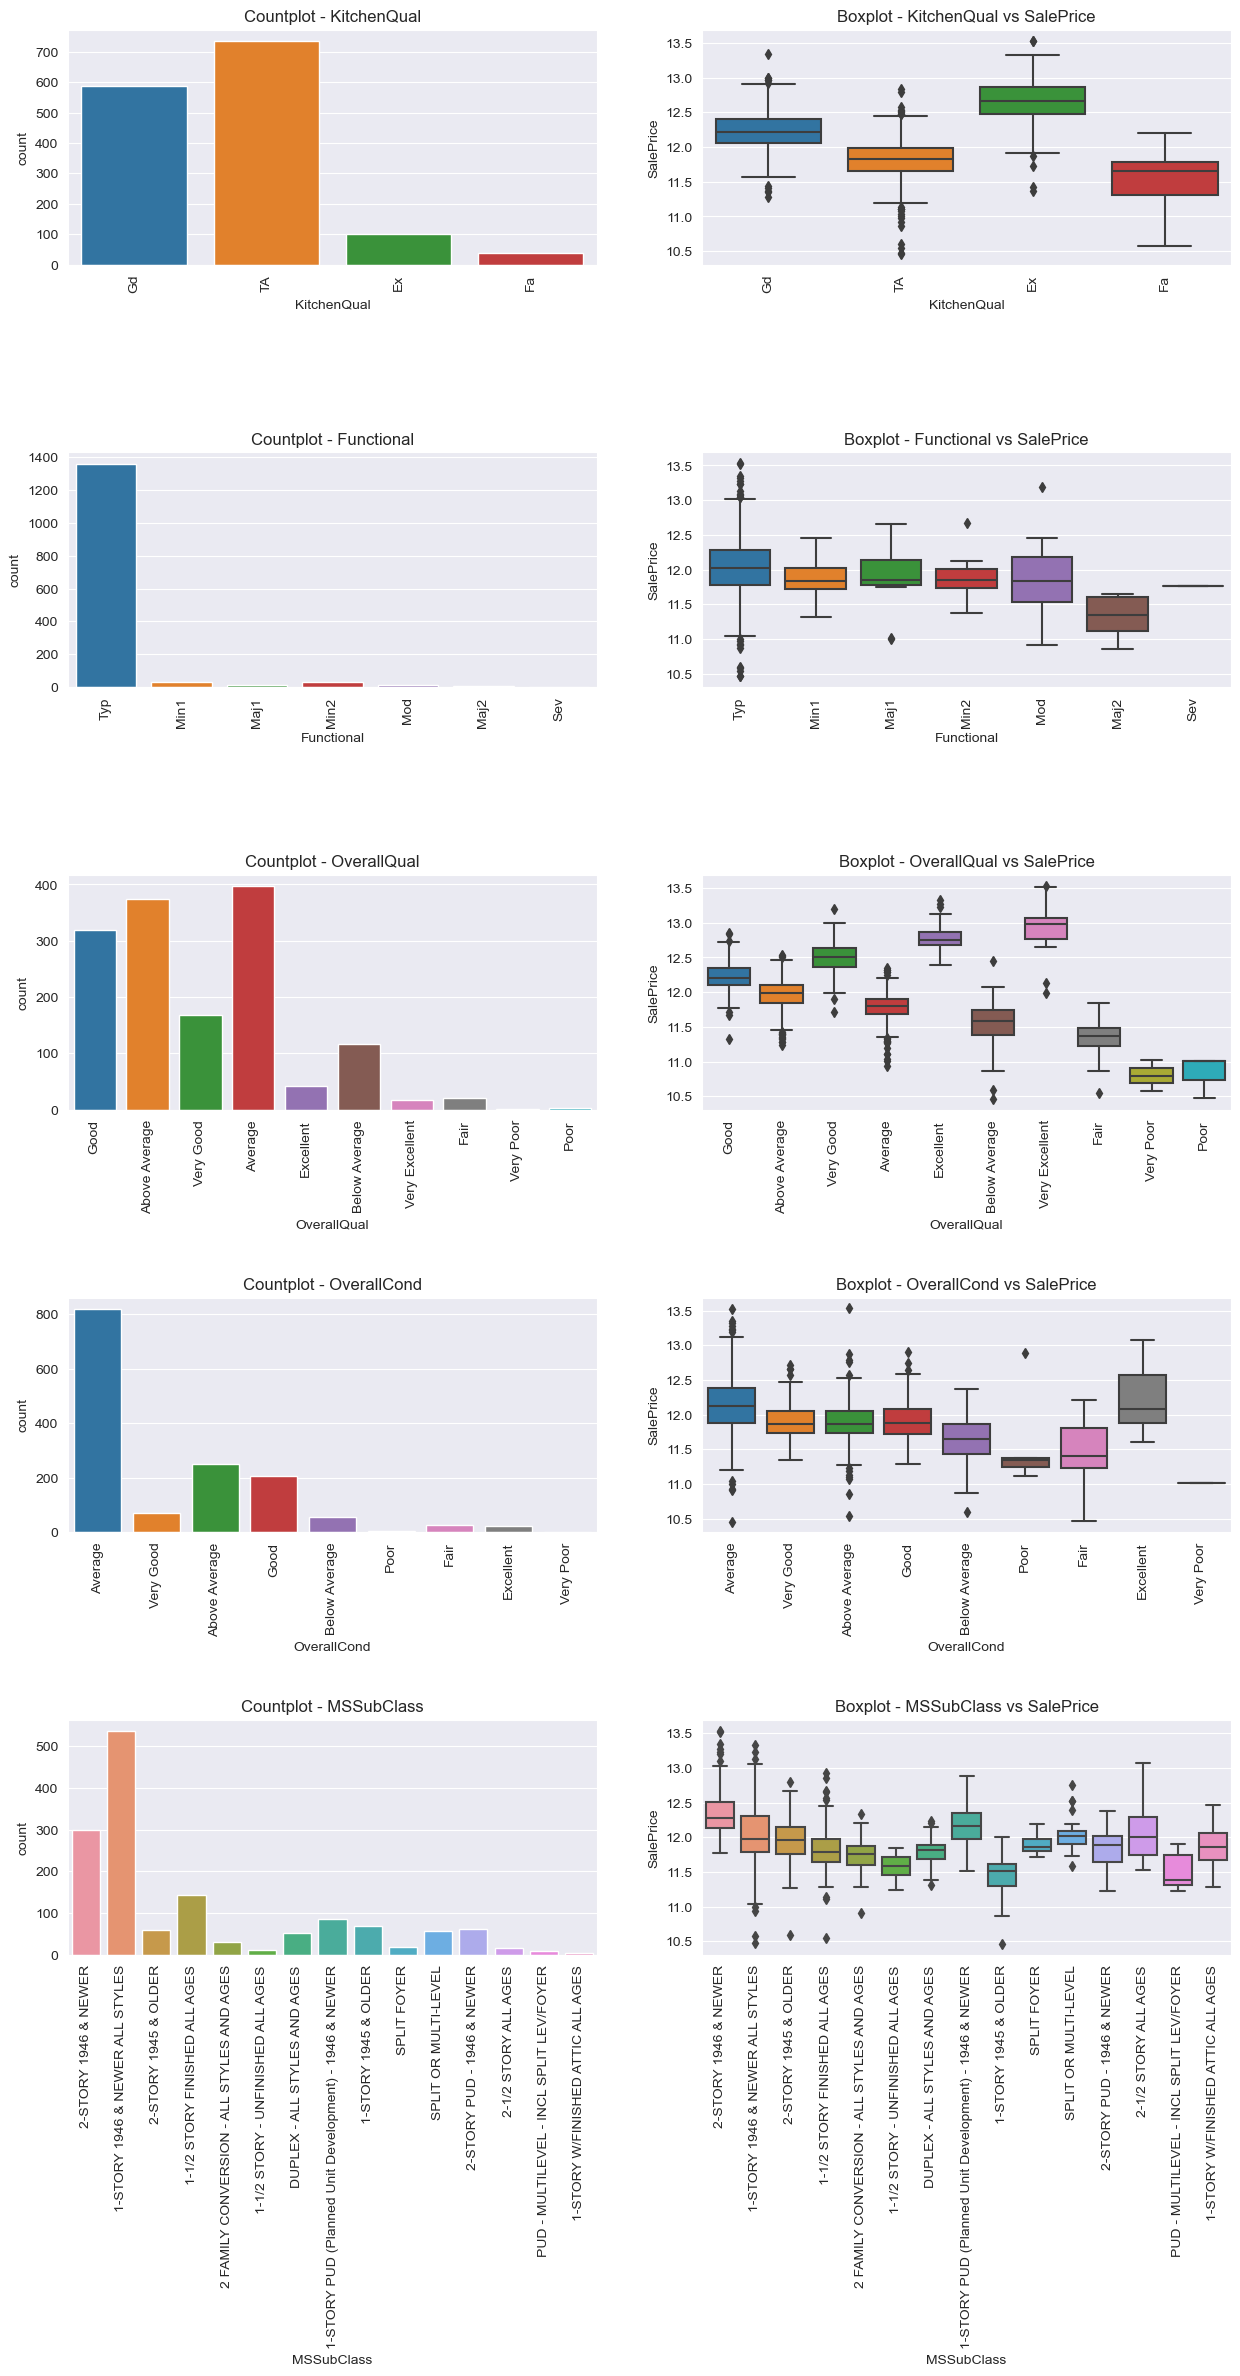

In [40]:
# Group 1

# List of columns for which you want to create plots
columns_to_plot1 = ['KitchenQual', 'Functional', 'OverallQual', 'OverallCond', 'MSSubClass']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=len(columns_to_plot1), ncols=2, figsize=(15, len(columns_to_plot1) * 5), gridspec_kw={'hspace': 0.8})
plt.tight_layout()

# Loop through each column
for i, column in enumerate(columns_to_plot1):
    # Countplot
    sns.countplot(x=column, data=SurpriseHouse, ax=axes[i, 0])
    axes[i, 0].set_title(f'Countplot - {column}')
    axes[i, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

    # Boxplot
    sns.boxplot(x=column, y='SalePrice', data=SurpriseHouse, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot - {column} vs SalePrice')
    axes[i, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Show the plots
plt.show()

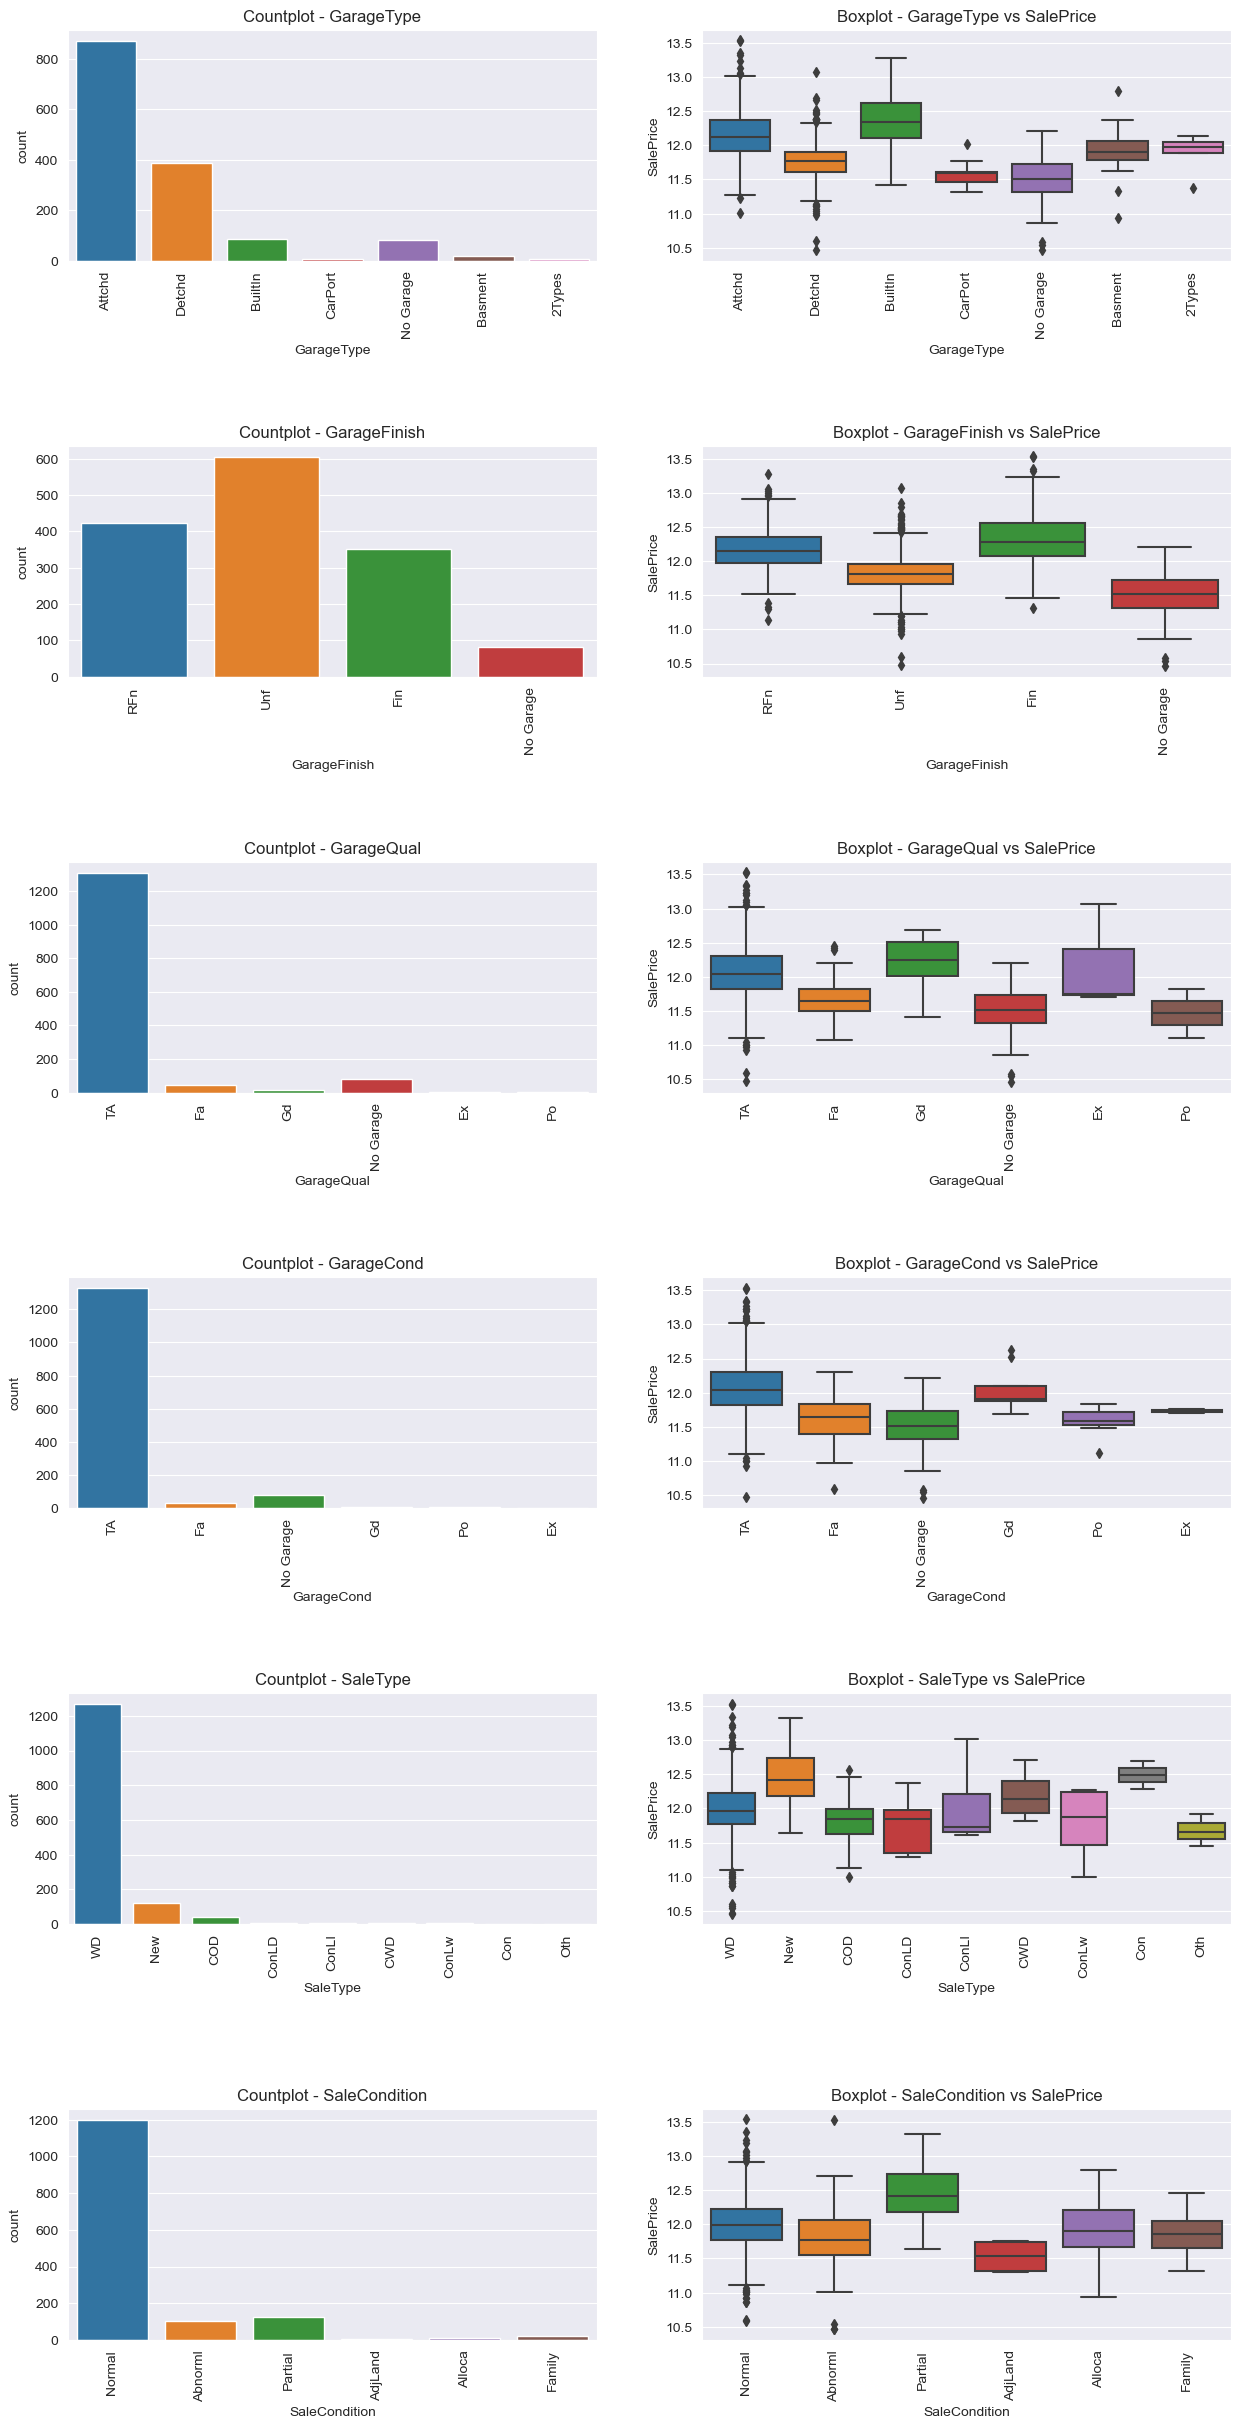

In [41]:
# Group 2


# List of columns for which you want to create plots
columns_to_plot2 = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType','SaleCondition' ]

# Set up the subplot grid
fig, axes = plt.subplots(nrows=len(columns_to_plot2), ncols=2, figsize=(15, len(columns_to_plot2) * 5), gridspec_kw={'hspace': 0.8})
plt.tight_layout()

# Loop through each column
for i, column in enumerate(columns_to_plot2):
    # Countplot
    sns.countplot(x=column, data=SurpriseHouse, ax=axes[i, 0])
    axes[i, 0].set_title(f'Countplot - {column}')
    axes[i, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

    # Boxplot
    sns.boxplot(x=column, y='SalePrice', data=SurpriseHouse, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot - {column} vs SalePrice')
    axes[i, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Show the plots
plt.show()



- Price of Builtin Garagetype and Finished garage is the highest

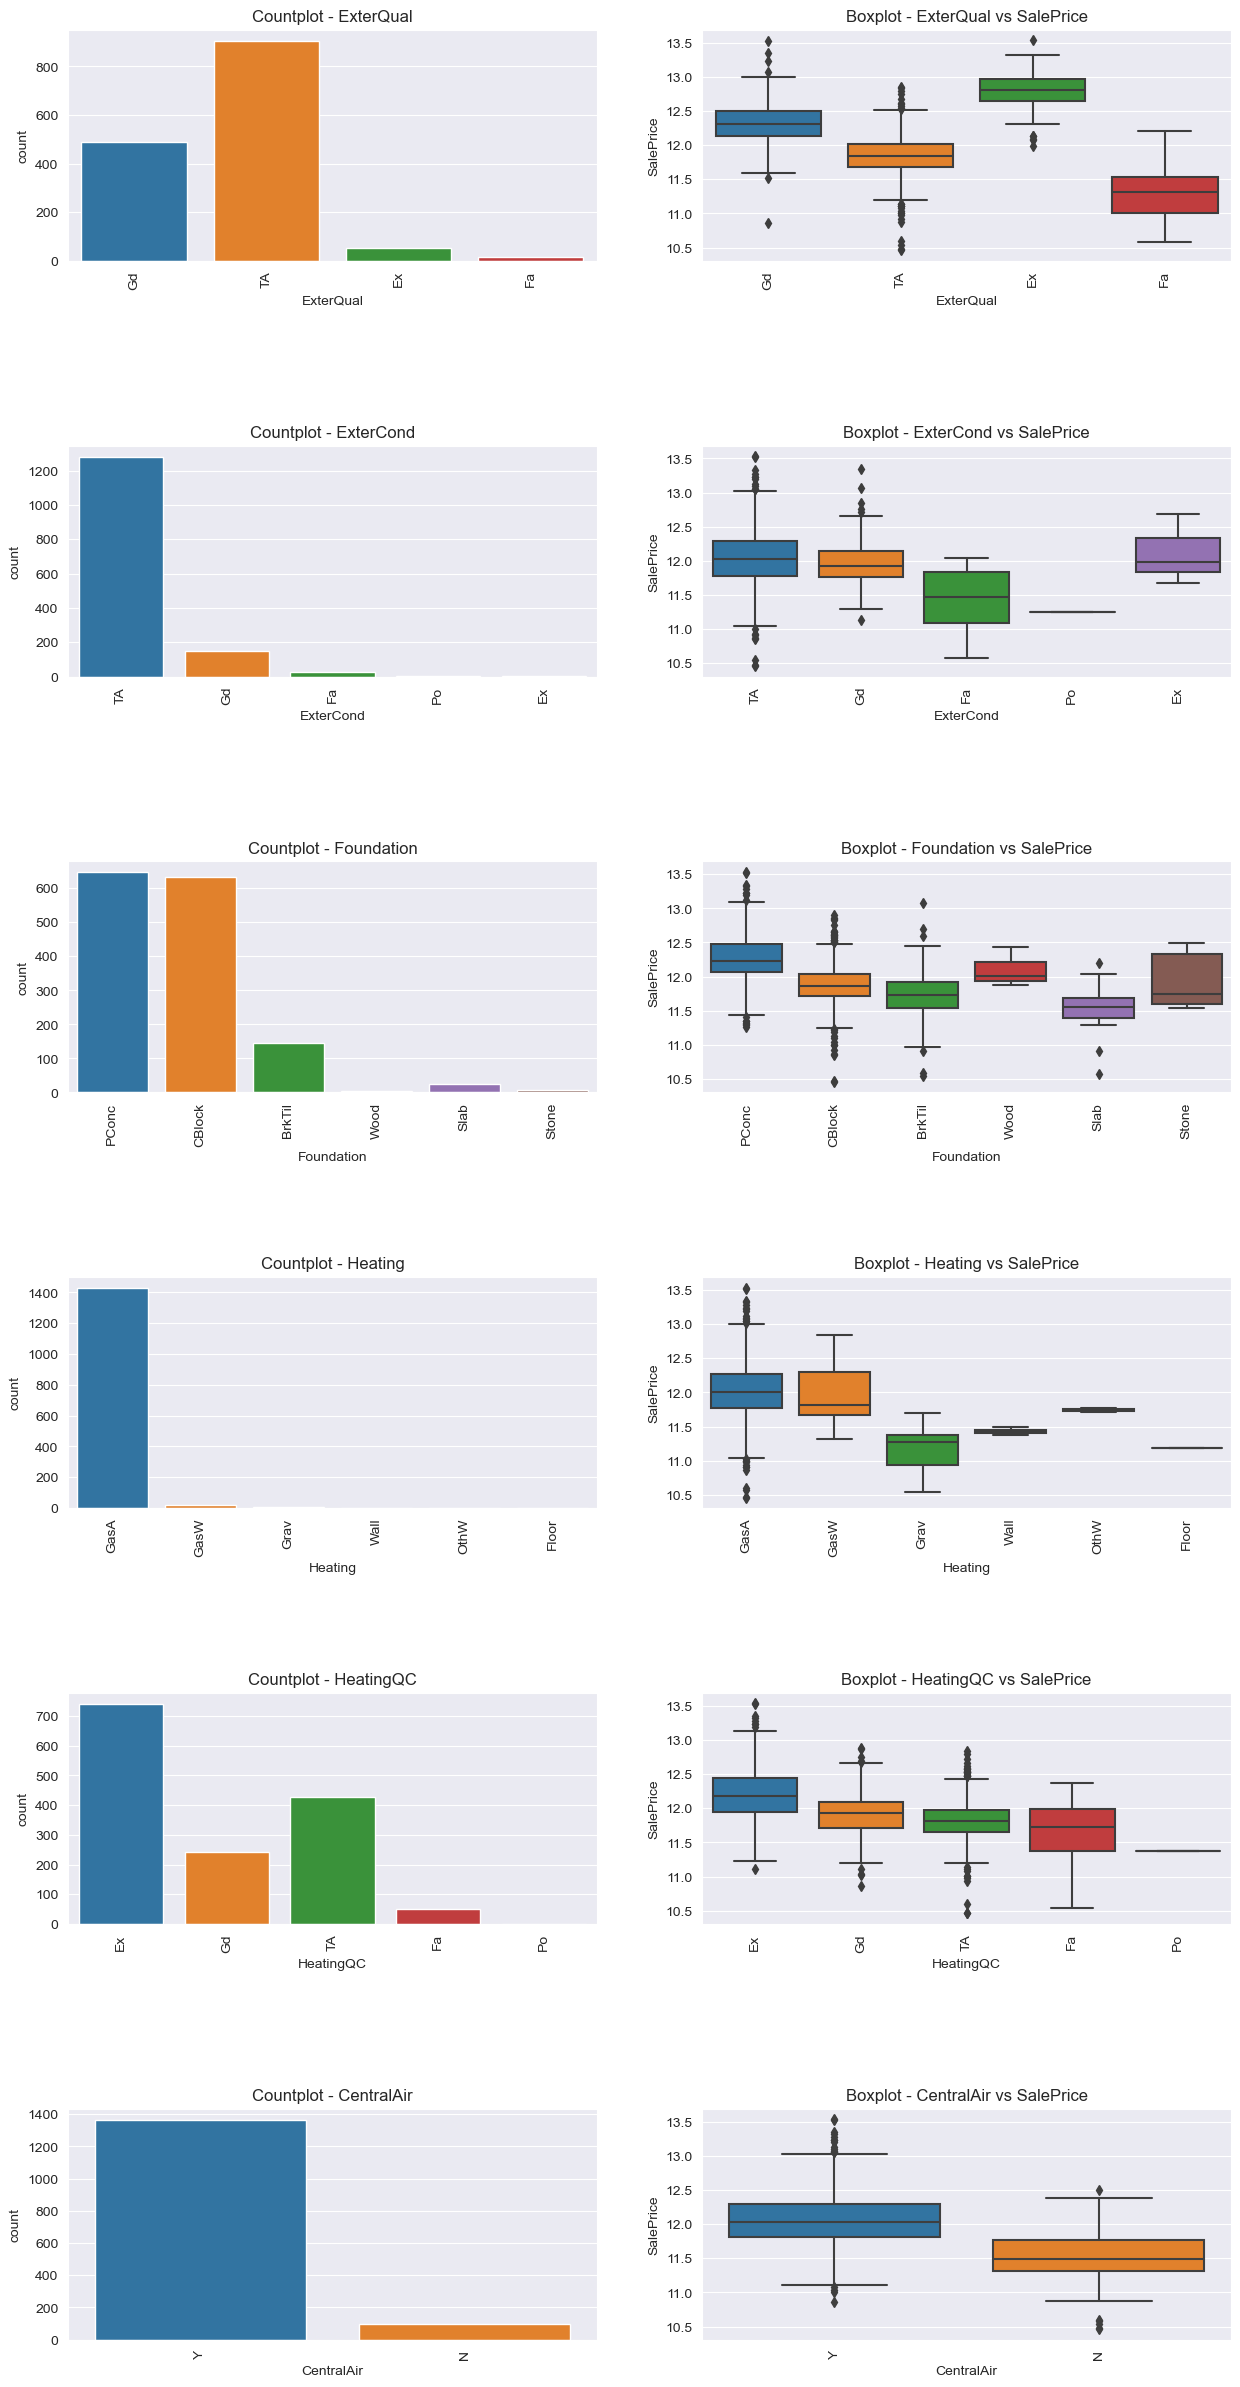

In [42]:
# Group 3


# List of columns for which you want to create plots
columns_to_plot3 = ['ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC','CentralAir' ]

# Set up the subplot grid
fig, axes = plt.subplots(nrows=len(columns_to_plot3), ncols=2, figsize=(15, len(columns_to_plot3) * 5), gridspec_kw={'hspace': 0.8})
plt.tight_layout()

# Loop through each column
for i, column in enumerate(columns_to_plot3):
    # Countplot
    sns.countplot(x=column, data=SurpriseHouse, ax=axes[i, 0])
    axes[i, 0].set_title(f'Countplot - {column}')
    axes[i, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

    # Boxplot
    sns.boxplot(x=column, y='SalePrice', data=SurpriseHouse, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot - {column} vs SalePrice')
    axes[i, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Show the plots
plt.show()


- Majority of ExterQual, ExerCond is TA
- Poured Contrete foundation are the highest in number
- Meanwhile variables like Heating , Central Airand Exter Cond are skewed so would be dropping these variables

- Price of Excellent ExterQual and HeatingQc is highest
- Price of Poured Contrete Foundation is highest.


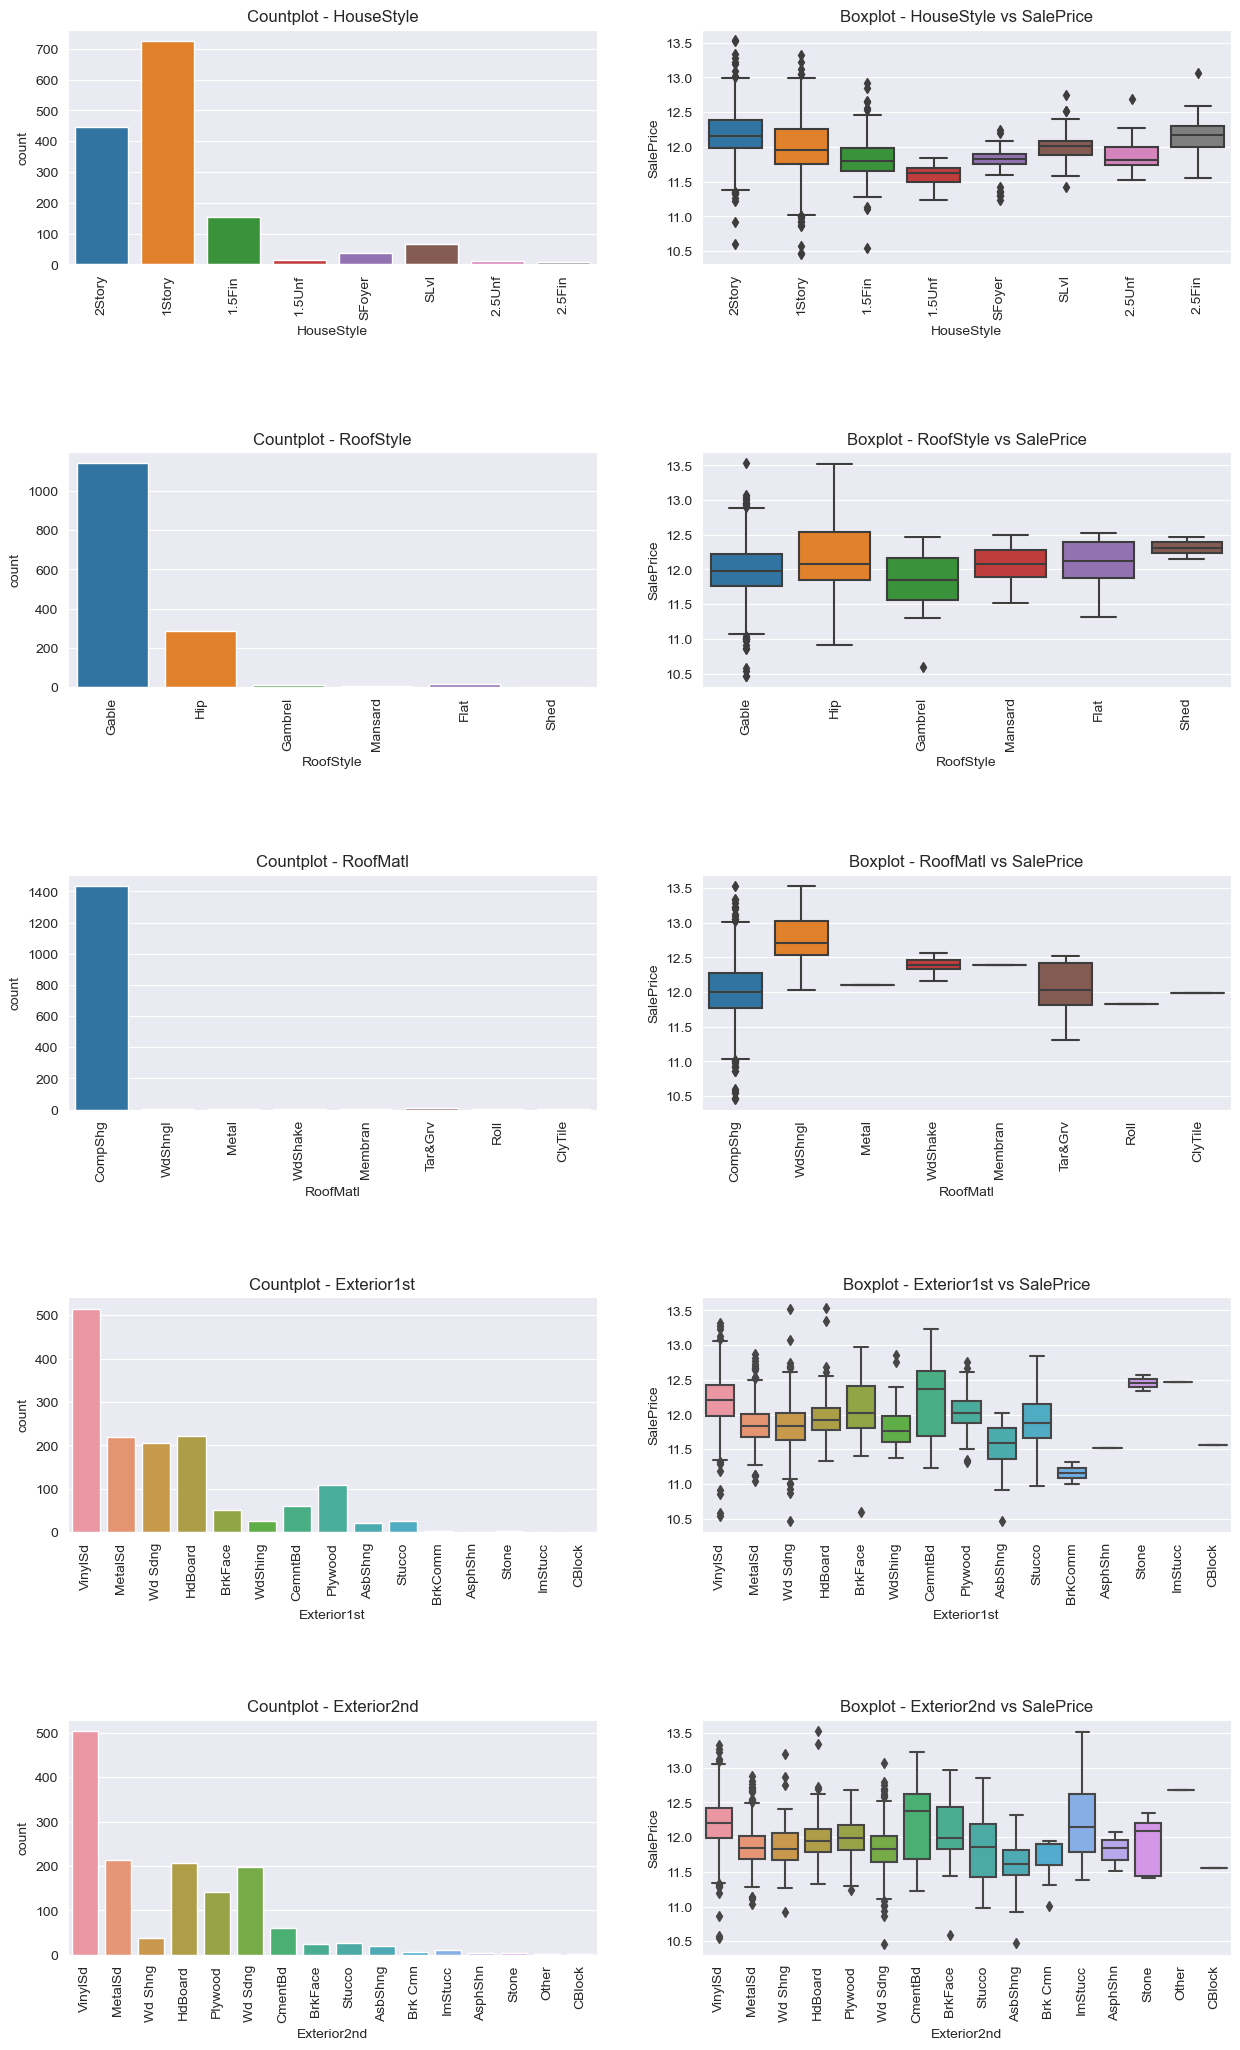

In [43]:
# Group 4



# List of columns for which you want to create plots
columns_to_plot4 = ['HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=len(columns_to_plot4), ncols=2, figsize=(15, len(columns_to_plot4) * 5), gridspec_kw={'hspace': 0.8})
plt.tight_layout()

# Loop through each column
for i, column in enumerate(columns_to_plot4):
    # Countplot
    sns.countplot(x=column, data=SurpriseHouse, ax=axes[i, 0])
    axes[i, 0].set_title(f'Countplot - {column}')
    axes[i, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

    # Boxplot
    sns.boxplot(x=column, y='SalePrice', data=SurpriseHouse, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot - {column} vs SalePrice')
    axes[i, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Show the plots
plt.show()


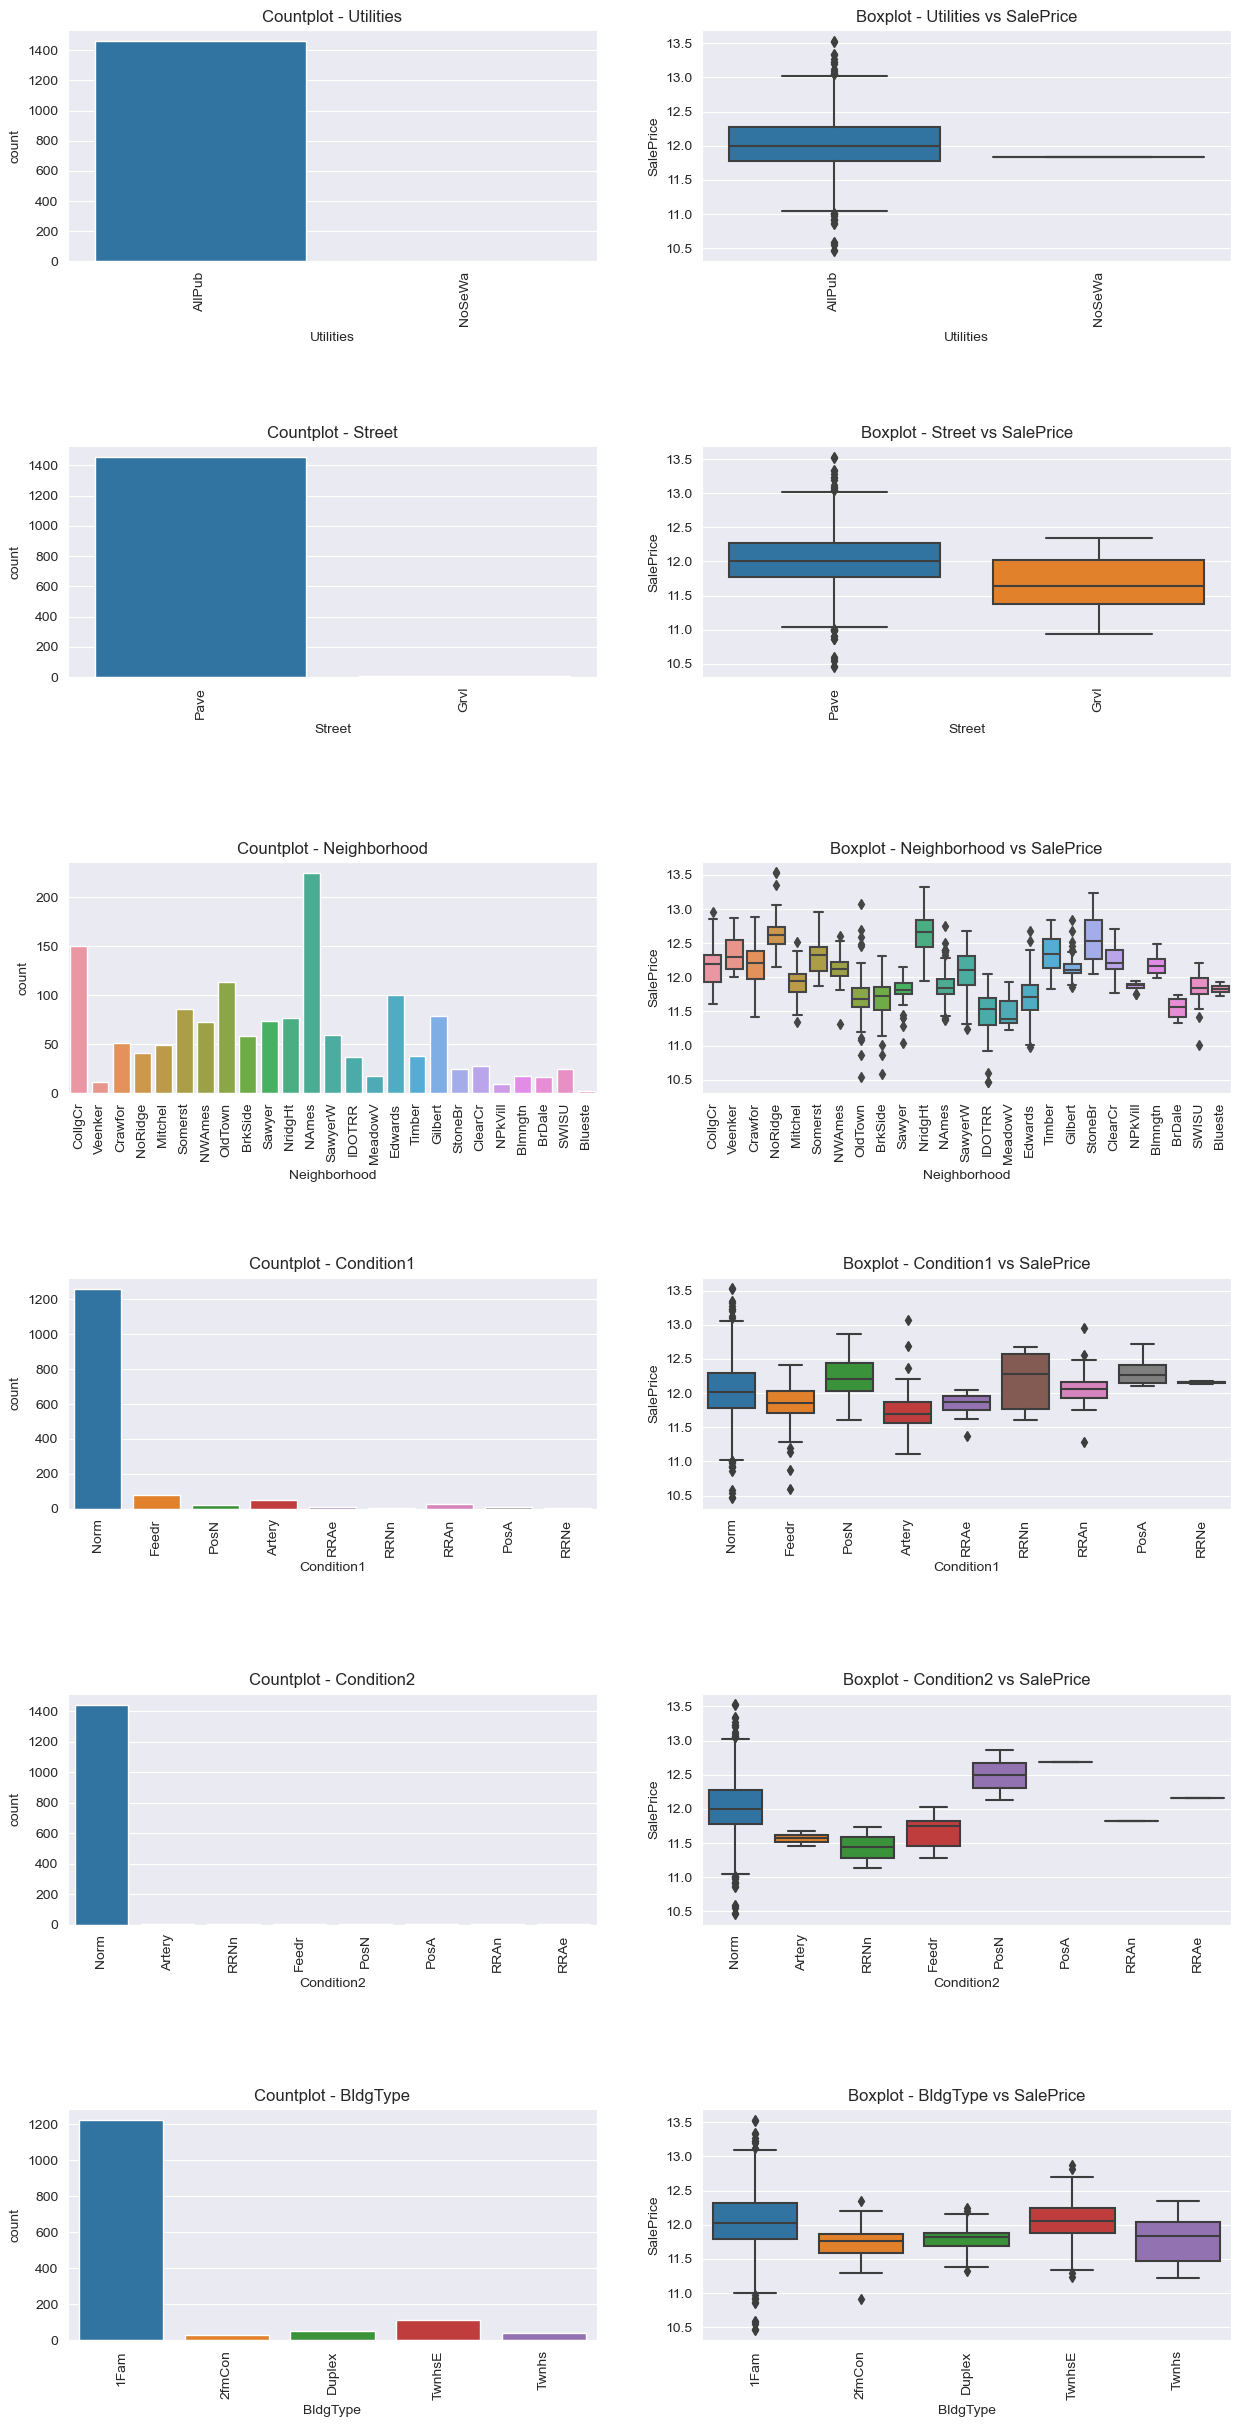

In [44]:
# Group 5

# List of columns for which you want to create plots
columns_to_plot5 = ['Utilities', 'Street', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=len(columns_to_plot5), ncols=2, figsize=(15, len(columns_to_plot5) * 5), gridspec_kw={'hspace': 0.8})
plt.tight_layout()

# Loop through each column
for i, column in enumerate(columns_to_plot5):
    # Countplot
    sns.countplot(x=column, data=SurpriseHouse, ax=axes[i, 0])
    axes[i, 0].set_title(f'Countplot - {column}')
    axes[i, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

    # Boxplot
    sns.boxplot(x=column, y='SalePrice', data=SurpriseHouse, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot - {column} vs SalePrice')
    axes[i, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Show the plots
plt.show()



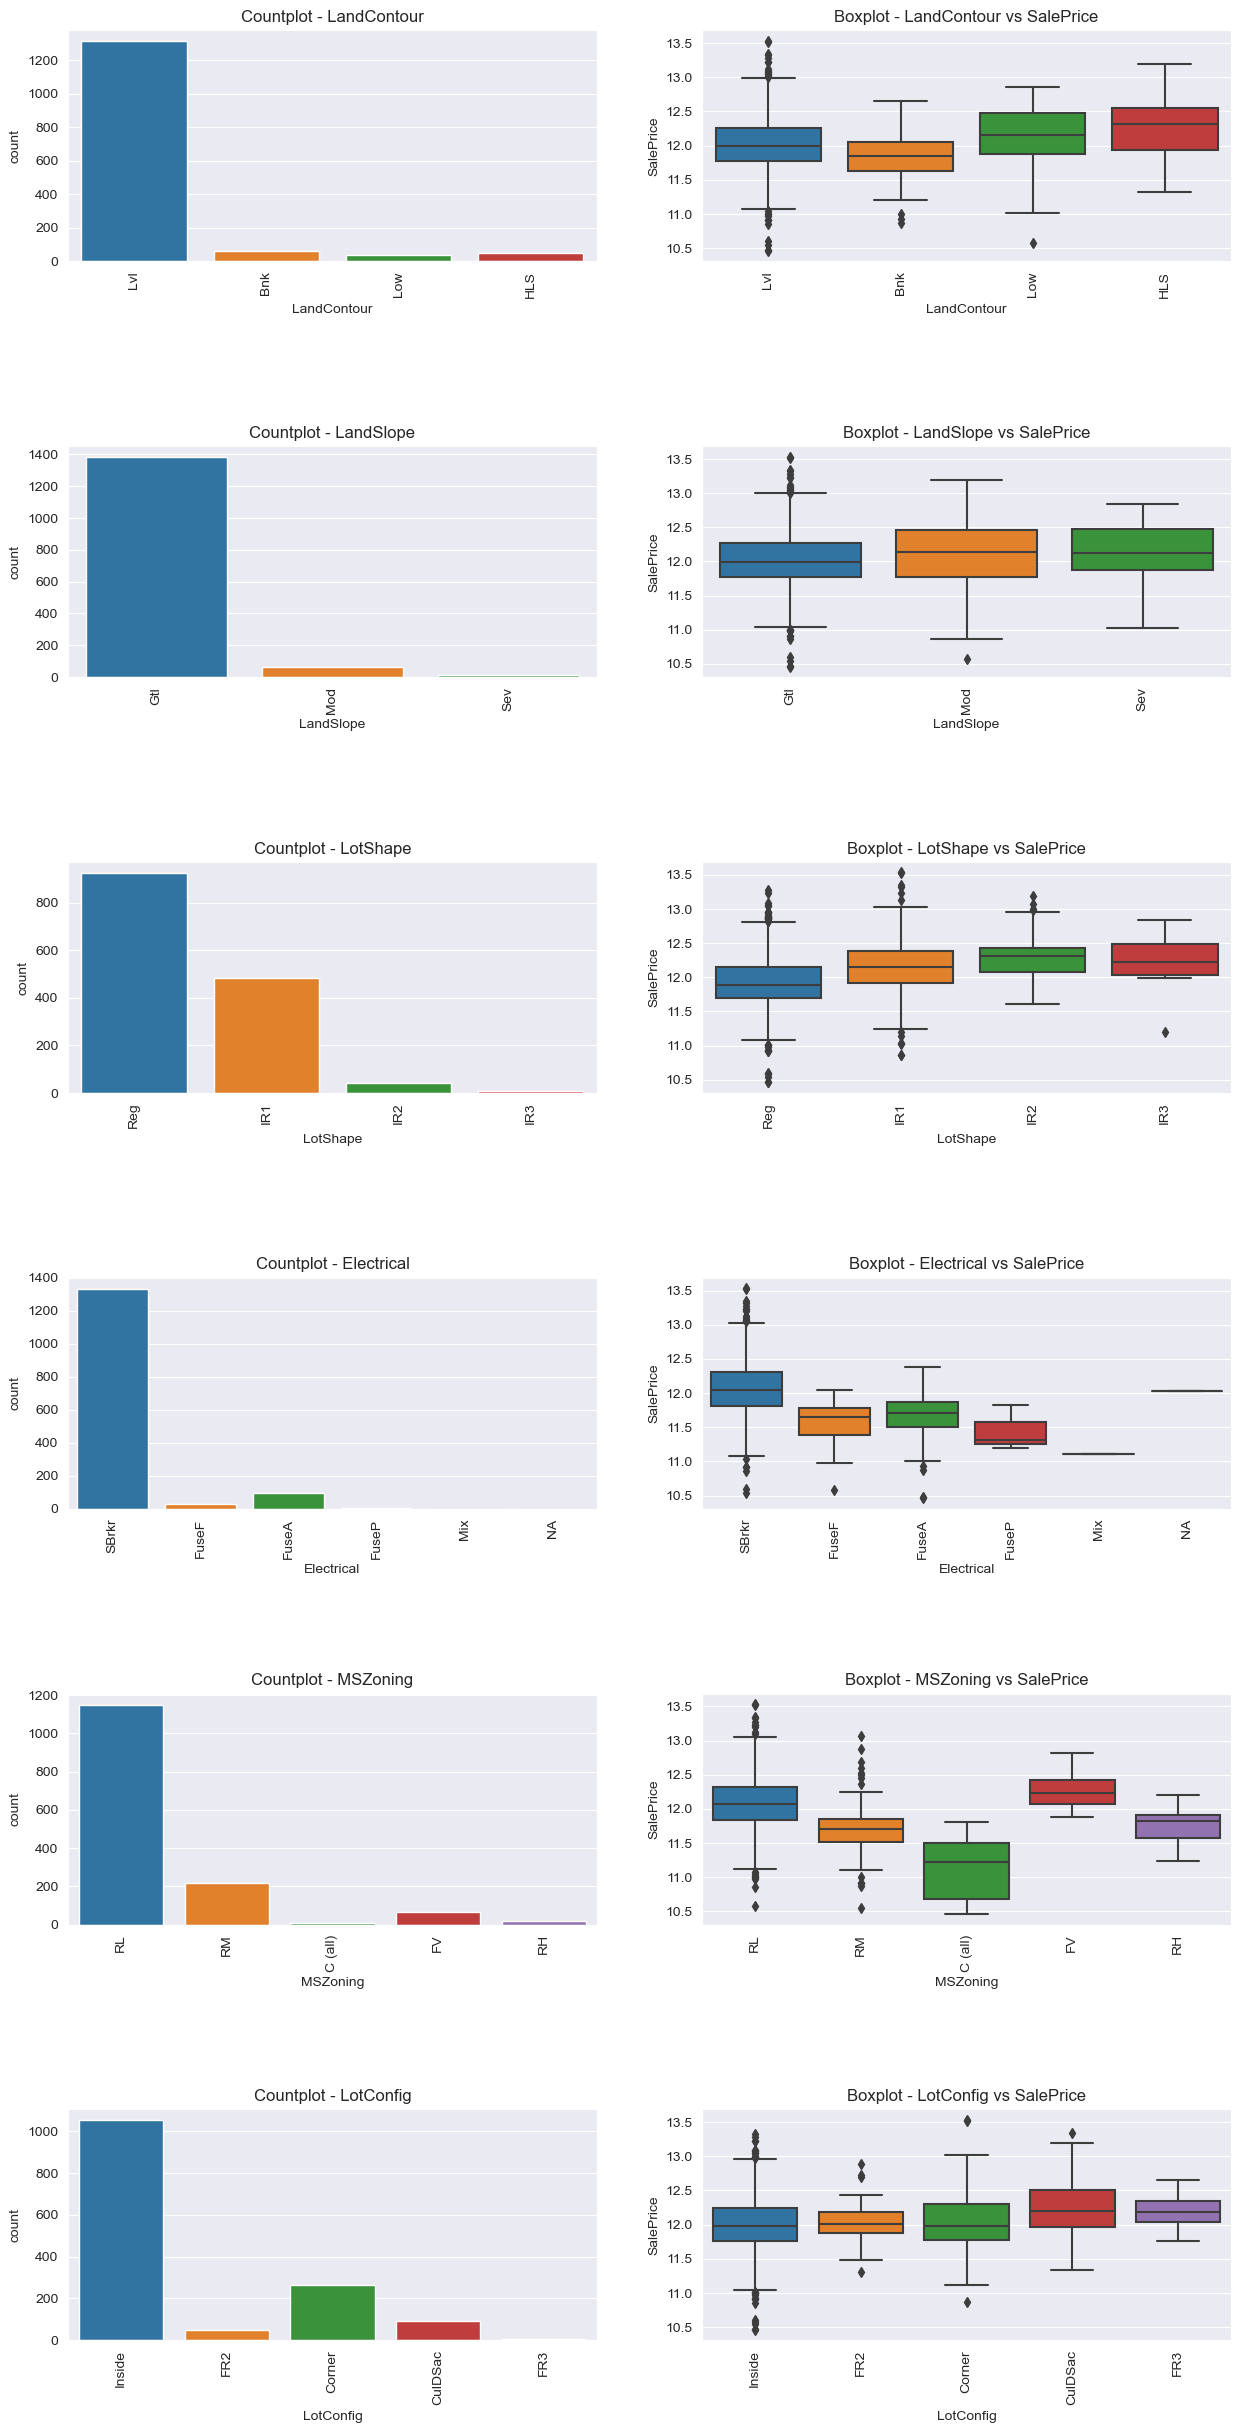

In [45]:
# Group 6

# List of columns for which you want to create plots
columns_to_plot6 = ['LandContour', 'LandSlope', 'LotShape', 'Electrical', 'MSZoning', 'LotConfig']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=len(columns_to_plot6), ncols=2, figsize=(15, len(columns_to_plot6) * 5), gridspec_kw={'hspace': 0.8})
plt.tight_layout()

# Loop through each column
for i, column in enumerate(columns_to_plot6):
    # Countplot
    sns.countplot(x=column, data=SurpriseHouse, ax=axes[i, 0])
    axes[i, 0].set_title(f'Countplot - {column}')
    axes[i, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

    # Boxplot
    sns.boxplot(x=column, y='SalePrice', data=SurpriseHouse, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot - {column} vs SalePrice')
    axes[i, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Show the plots
plt.show()


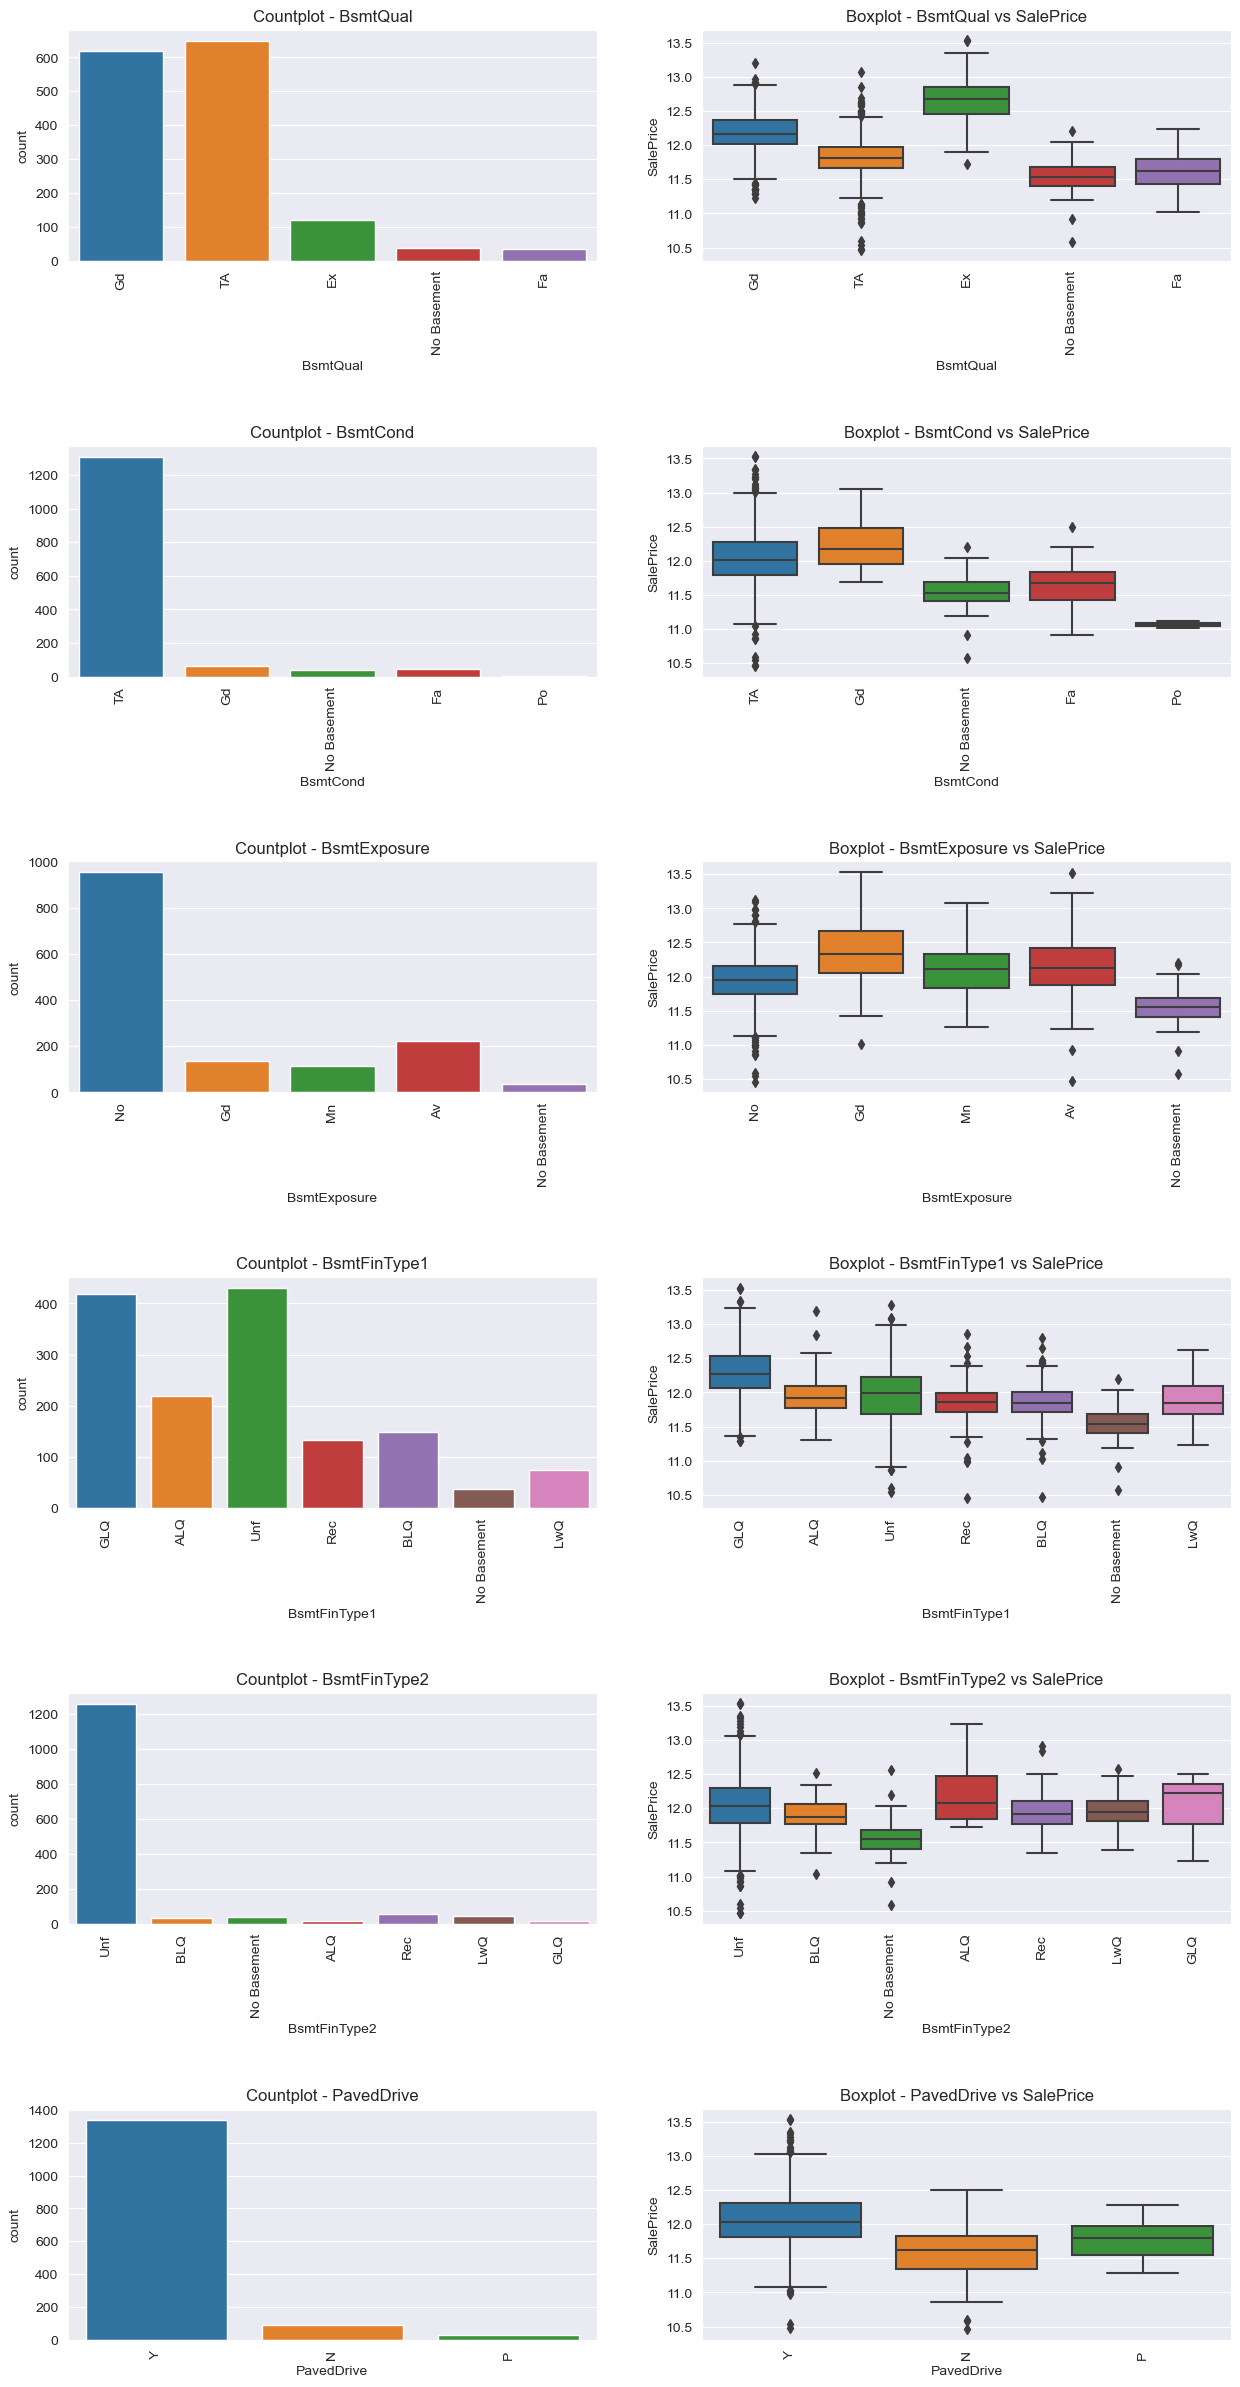

In [46]:
# Group 7


# List of columns for which you want to create plots
columns_to_plot7 = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'PavedDrive']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=len(columns_to_plot7), ncols=2, figsize=(15, len(columns_to_plot7) * 5), gridspec_kw={'hspace': 0.8})
plt.tight_layout()

# Loop through each column
for i, column in enumerate(columns_to_plot7):
    # Countplot
    sns.countplot(x=column, data=SurpriseHouse, ax=axes[i, 0])
    axes[i, 0].set_title(f'Countplot - {column}')
    axes[i, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

    # Boxplot
    sns.boxplot(x=column, y='SalePrice', data=SurpriseHouse, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot - {column} vs SalePrice')
    axes[i, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Show the plots
plt.show()


In [47]:
SurpriseHouse.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle    OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           Good     Average       2003   
1       Norm     1Fam     1Story  Above Average   Very Good       1976   
2       Norm     1Fam     2Story           Good     Average       2001   
3       Norm     1Fam     2Story           Good     Average       1915   
4       Norm     1Fam     2Story      Very Good     Average       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea  \
0          2003     Gable  CompShg     VinylSd     VinylSd       196.0   
1          1976     Gable  CompShg     MetalSd     MetalSd         0.0   
2          2002     Gable  CompShg     VinylSd     VinylSd       162.0   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng         0.0   
4          2000     Gable  CompShg     VinylSd     VinylSd       350.0   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          Gd             8        Typ           0     Attchd   
1             1          TA             6        Typ           1     Attchd   
2             1          Gd             6        Typ           1     Attchd   
3            

In [48]:
SurpriseHouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

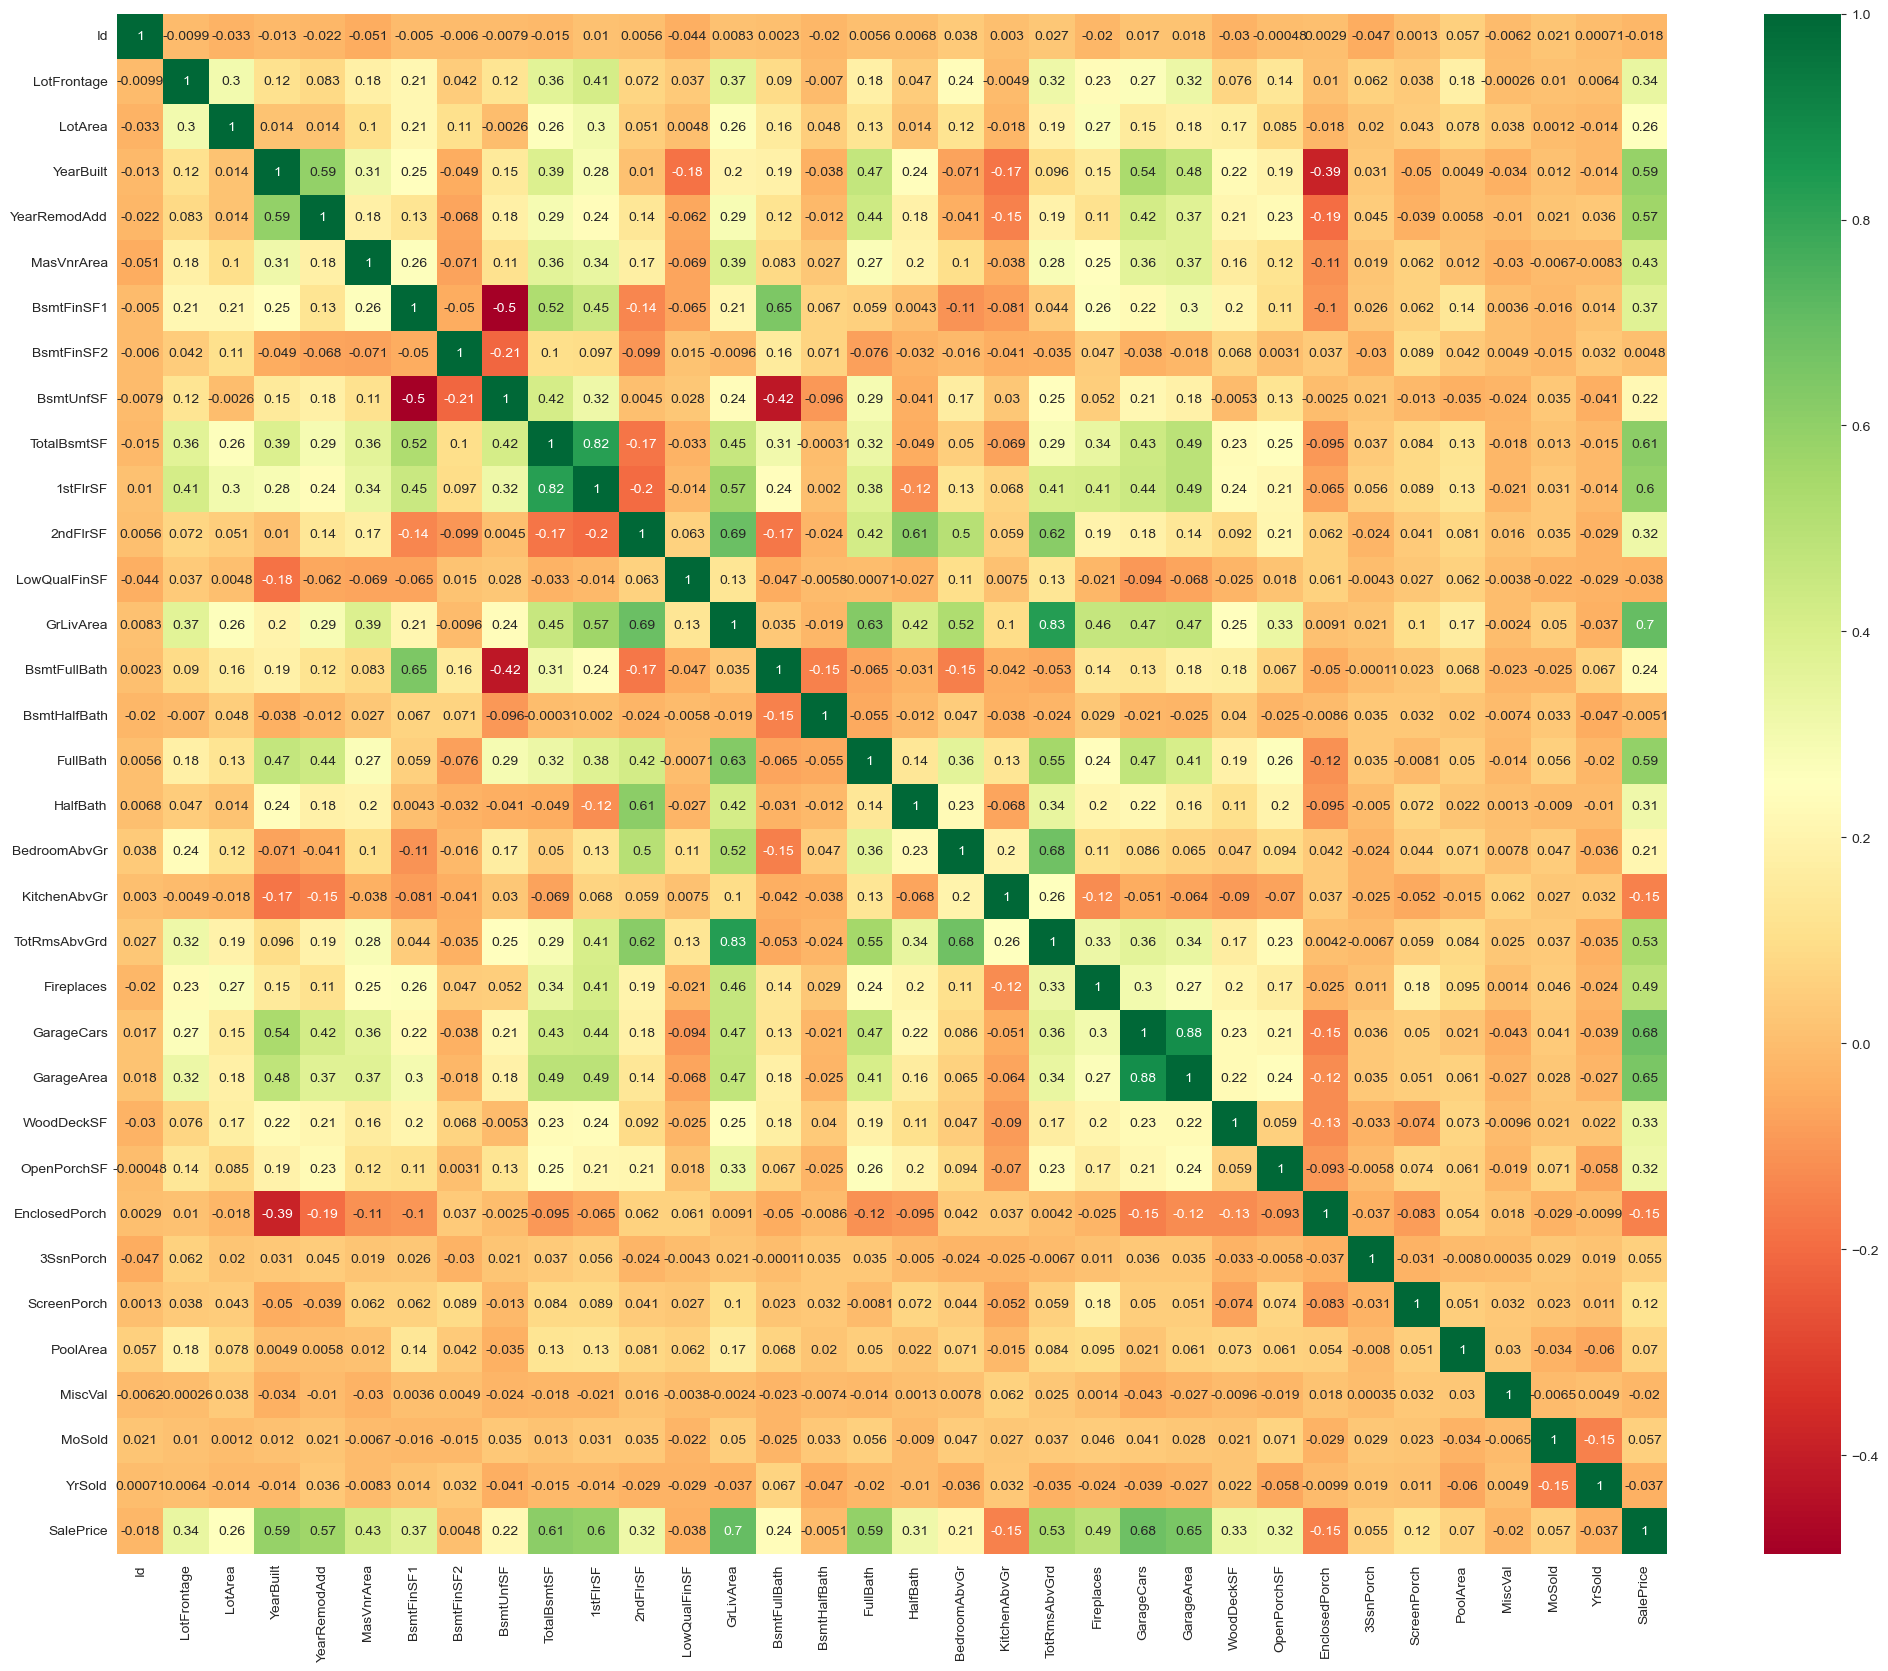

In [49]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(cont_cols.corr(), annot=True, cmap='RdYlGn');

- Many columns are highly correlated with each other.
- Target variable SalePrice is highly correlated with GarageArea, GarageCars, GrLivArea, and TotalBsmtSF.
- As there is multicollinearity among predictors in our data, it would be good to use Ridge Regression.

### Feature Engineering

In [50]:
## Create new column for the age of the house
SurpriseHouse['Age'] = SurpriseHouse['YrSold'] - SurpriseHouse['YearBuilt']

In [51]:
## Drop the two columns from which we created new one
SurpriseHouse.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [52]:
## View the dataframe again
SurpriseHouse.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle    OverallQual OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story           Good     Average          2003   
1       Norm     1Fam     1Story  Above Average   Very Good          1976   
2       Norm     1Fam     2Story           Good     Average          2002   
3       Norm     1Fam     2Story           Good     Average          1970   
4       Norm     1Fam     2Story      Very Good     Average          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond  \
0     Gable  CompShg     VinylSd     VinylSd       196.0        Gd        TA   
1     Gable  CompShg     MetalSd     MetalSd         0.0        TA        TA   
2     Gable  CompShg     VinylSd     VinylSd       162.0        Gd        TA   
3     Gable  CompShg     Wd Sdng     Wd Shng         0.0        TA        TA   
4     Gable  CompShg     VinylSd     VinylSd       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType GarageYrBlt  \
0          Gd             8        Typ           0     Attchd        2003   
1          TA             6        Typ           1     Attchd        1976   
2          Gd             6        Typ           1     Attchd        2001   
3  

Now, our data is clean.

# STEP 3: Model Building, Tuning & Evaluation
 * Split the Data into Dependent and Independent variables
     * Train - Test Split
     * Scaling numerical columns
     Model 1: Ridge Regression
     Model 2: Lasso

In [53]:
#checking all categorical columns to form dummy variables
Cat1 = SurpriseHouse.select_dtypes(include=['object']) 
Cat1.columns


Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [54]:
#all numerical variables
Num = SurpriseHouse.select_dtypes(include=['int64','float64'])
Num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Age'],
      dtype='object')

In [55]:
Num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1460 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   int64  
 14  BsmtHalfBath   1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

In [56]:
# Dummy variables
Cat1 = pd.get_dummies(Cat1,drop_first=True)  
print(Cat1.shape)

(1460, 331)


#### Outlier treatment

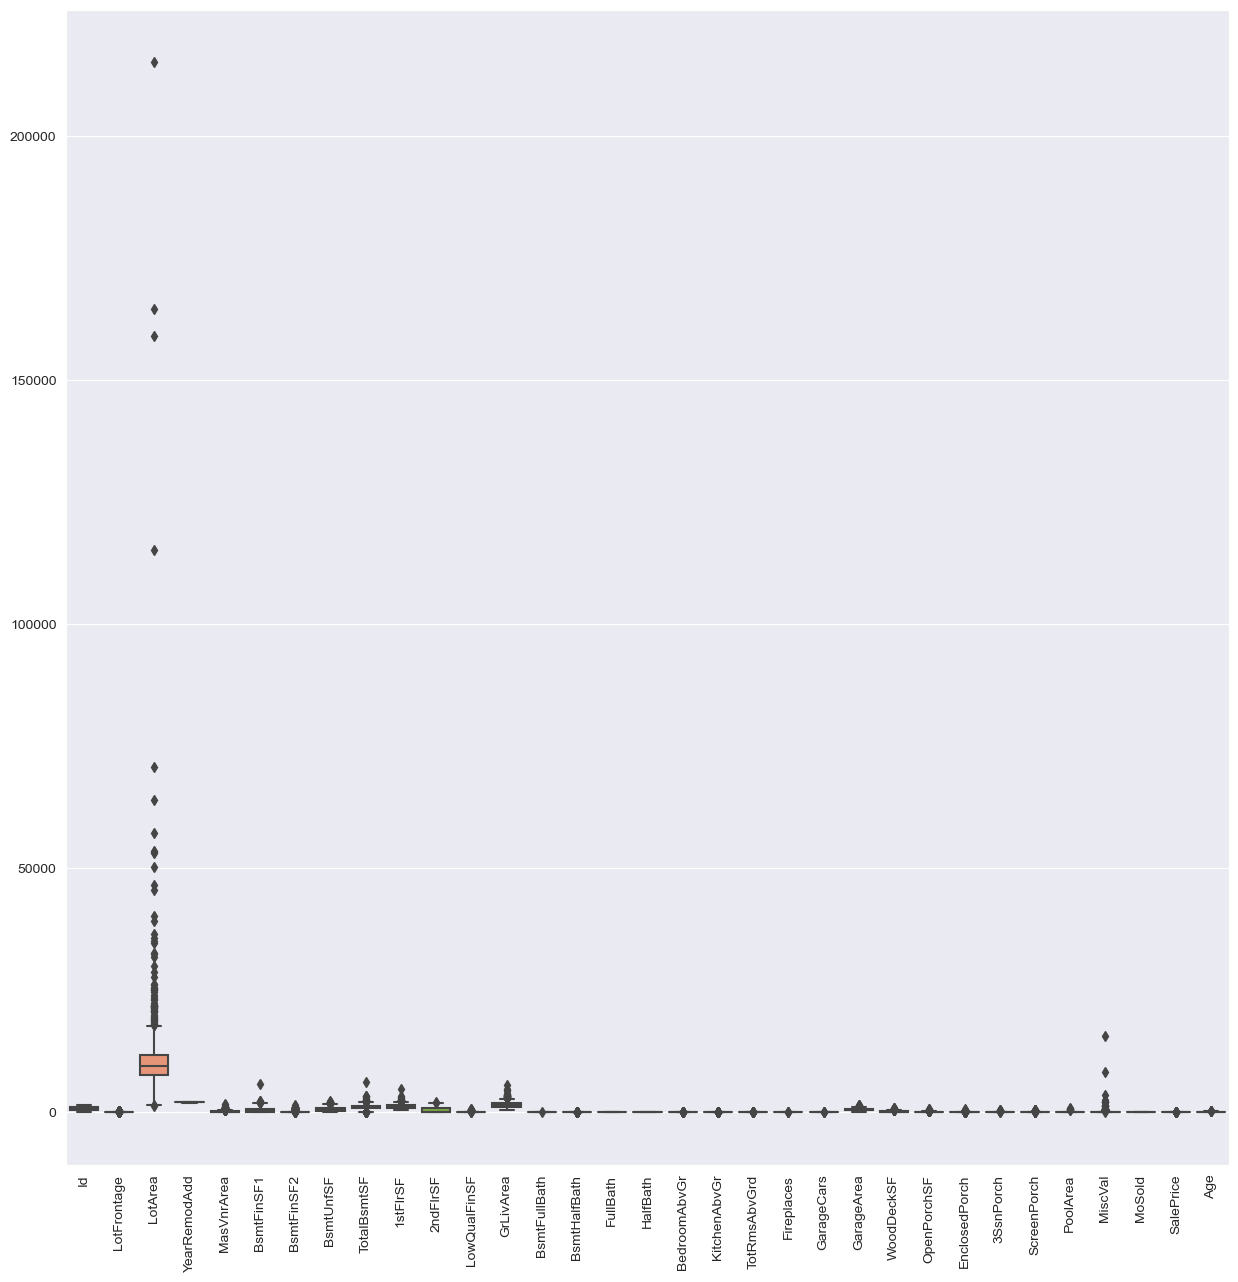

In [57]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=Num);

In [58]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in Num.columns:
    Num[col][Num[col] <= Num[col].quantile(0.05)] = Num[col].quantile(0.05)
    Num[col][Num[col] >= Num[col].quantile(0.95)] = Num[col].quantile(0.95)

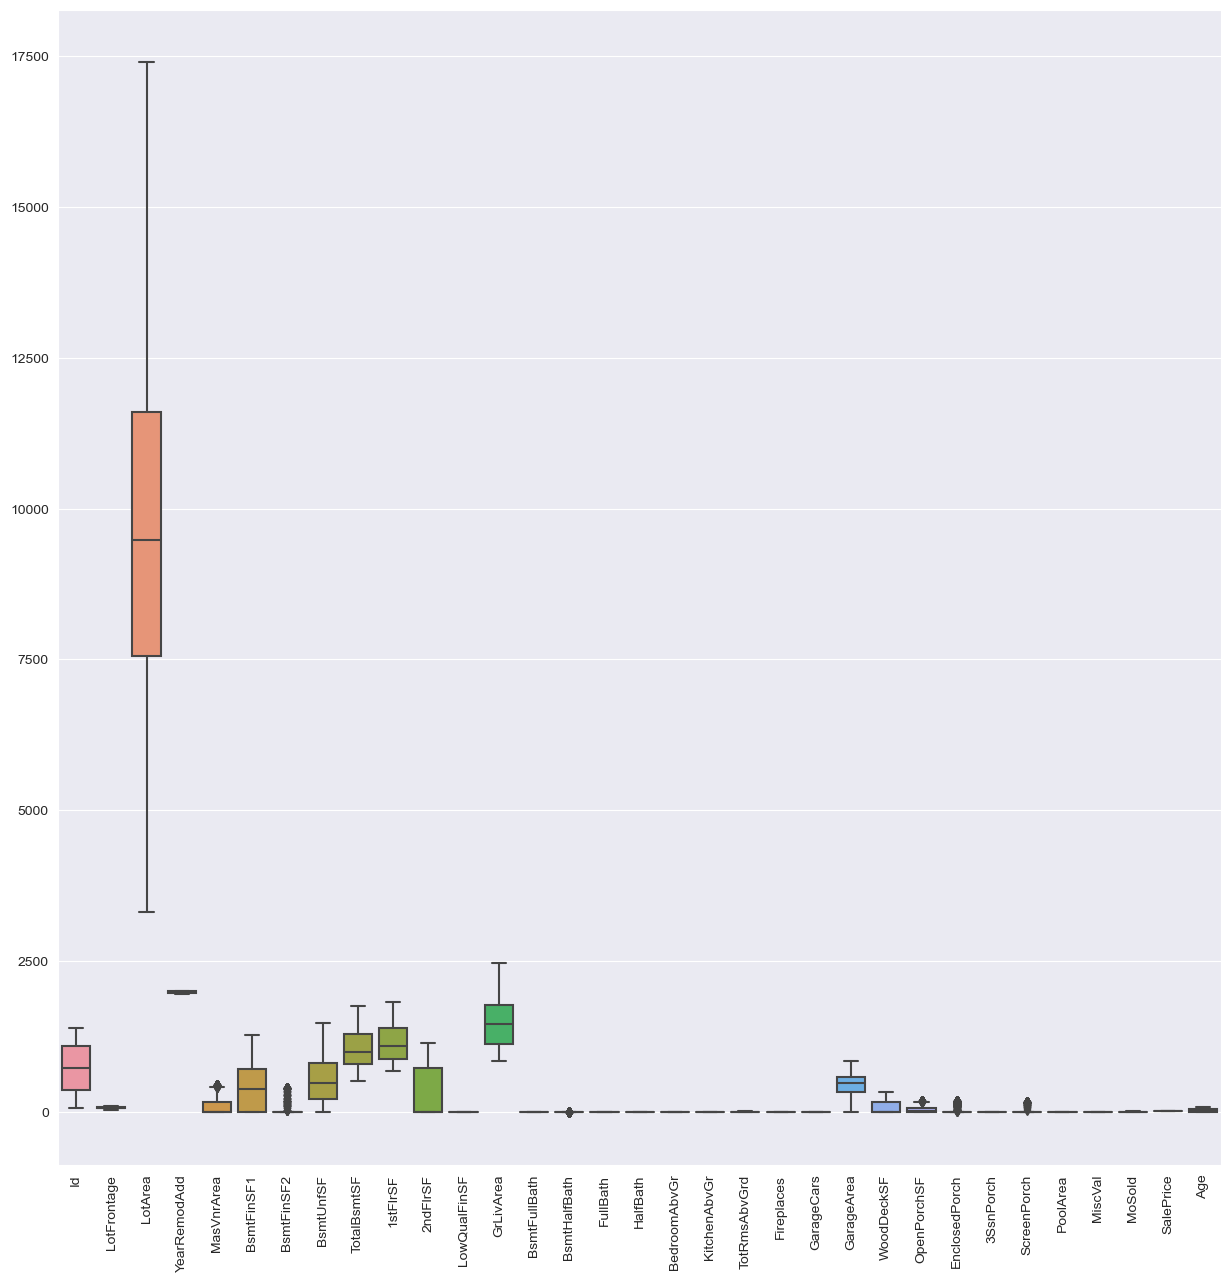

In [59]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=Num);

- So, we have removed outliers from all numerical columns¶


In [60]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
SurpriseHouse = pd.concat([Num, Cat1], axis=1)


## View the first few rows of our dataframe
SurpriseHouse.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0  73.95         65.0   8450.0          2003       196.0         706   
1  73.95         80.0   9600.0          1976         0.0         978   
2  73.95         68.0  11250.0          2002       162.0         486   
3  73.95         60.0   9550.0          1970         0.0         216   
4  73.95         84.0  14260.0          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0        150        856.0     856.0     854.0             0   
1         0.0        284       1262.0    1262.0       0.0             0   
2         0.0        434        920.0     920.0     866.0             0   
3         0.0        540        756.0     961.0     756.0             0   
4         0.0        490       1145.0    1145.0    1053.0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0     1710.0             1             0         2         1             3   
1     1262.0             0             1         2         0             3   
2     1786.0             1             0         2         1             3   
3     1717.0             1             0         1         0             3   
4     2198.0             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2       548.0           0   
1             1             6           1           2       460.0         298   
2             1             6           1           2       608.0           0   
3             1             7           1           3       642.0           0   
4             1             9           1           3       836.0         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0         61.0           0.00          0            0         0        0   
1          0.0           0.00          0            0         0        0   
2         42.0           0.00          0            0         0        0   
3         35.0         180.15          0            0         0        0   
4         84.0           0.00          0            0         0        0   

   MoSold  SalePrice  Age  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
0       2  12.247694    5                                         0   
1       5  12.109011   31                                         0   
2       9  12.317167    7                                         0   
3       2  11.849398   91                                         0   
4      11  12.429216    8                                         0   

   MSSubClass_1-STORY 1945 & OLDER  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY C

- Now, our dataframe is ready for model building


In [61]:
# Putting feature variable to X
X = SurpriseHouse.drop(['SalePrice'], axis=1)

X.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0  73.95         65.0   8450.0          2003       196.0         706   
1  73.95         80.0   9600.0          1976         0.0         978   
2  73.95         68.0  11250.0          2002       162.0         486   
3  73.95         60.0   9550.0          1970         0.0         216   
4  73.95         84.0  14260.0          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0        150        856.0     856.0     854.0             0   
1         0.0        284       1262.0    1262.0       0.0             0   
2         0.0        434        920.0     920.0     866.0             0   
3         0.0        540        756.0     961.0     756.0             0   
4         0.0        490       1145.0    1145.0    1053.0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0     1710.0             1             0         2         1             3   
1     1262.0             0             1         2         0             3   
2     1786.0             1             0         2         1             3   
3     1717.0             1             0         1         0             3   
4     2198.0             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2       548.0           0   
1             1             6           1           2       460.0         298   
2             1             6           1           2       608.0           0   
3             1             7           1           3       642.0           0   
4             1             9           1           3       836.0         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0         61.0           0.00          0            0         0        0   
1          0.0           0.00          0            0         0        0   
2         42.0           0.00          0            0         0        0   
3         35.0         180.15          0            0         0        0   
4         84.0           0.00          0            0         0        0   

   MoSold  Age  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
0       2    5                                         0   
1       5   31                                         0   
2       9    7                                         0   
3       2   91                                         0   
4      11    8                                         0   

   MSSubClass_1-STORY 1945 & OLDER  \
0                                0   
1                                0   
2                                0   
3                                0   
4                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                              

In [62]:
# Putting response variable to y
y = SurpriseHouse['SalePrice']

y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [63]:
## Splitting X and y into 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [64]:
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1168, 363)
(1168,)


In [65]:
## View dimensions of test data
print(X_test.shape)
print(y_test.shape)

(292, 363)
(292,)


In [66]:
## Create a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['Id',
 'LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [67]:
## Create a scaling instance
scaler = StandardScaler()

## Scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Model Building and Evaluation
      - Ridge and Lasso Regression


### Model 1:  Ridge 


In [68]:
## Define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    
    '''
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [69]:
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
## View the optimal value of alpha
model_cv.best_params_

{'alpha': 9.0}

In [71]:
## View the results of cross validation search
model_cv.cv_results_

{'mean_fit_time': array([0.01117921, 0.01084261, 0.01225023, 0.01044908, 0.00985203,
        0.00892258, 0.00997267, 0.01834469, 0.01286988, 0.01085601,
        0.01659503, 0.01566472, 0.01669884, 0.01774473, 0.01548367,
        0.01682987, 0.01340919, 0.01776009, 0.01024375, 0.01764002,
        0.01590643, 0.01165838, 0.01209011, 0.01341405, 0.01121635,
        0.01028681, 0.01023006, 0.00975776]),
 'std_fit_time': array([0.00184913, 0.00163194, 0.00279242, 0.00104679, 0.00111837,
        0.00030076, 0.00166213, 0.00557743, 0.00188168, 0.00149011,
        0.01304059, 0.00923879, 0.00441735, 0.00769481, 0.00564948,
        0.00416758, 0.00401289, 0.00463641, 0.00174416, 0.00672577,
        0.00391252, 0.00289514, 0.002795  , 0.00117274, 0.00217868,
        0.00084986, 0.00095651, 0.00110002]),
 'mean_score_time': array([0.0021636 , 0.00357265, 0.00226445, 0.00241461, 0.00212502,
        0.00246282, 0.00201988, 0.00204339, 0.00217462, 0.00932946,
        0.00348921, 0.00300989, 0.003465

- Thus, we get optimum value of alpha as 9. Now we will build a ridge regression model using this value.

In [72]:
# Create a ridge regreesion instance with optimum value alpha=10
ridge = Ridge(alpha=9.0)

In [73]:
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=9.0)

In [74]:
## View the coefficients of ridge regression fitted model
ridge.coef_

array([-1.06590023e-03,  5.09069082e-03,  2.07604993e-02,  2.38198817e-02,
        5.64934000e-04,  8.89365593e-03, -1.85207625e-03, -1.57154115e-02,
        5.22925872e-02,  5.96149966e-03,  2.80193298e-02,  0.00000000e+00,
        9.11327586e-02,  8.36999670e-03, -1.04424371e-03,  1.22432136e-02,
        1.22788440e-02,  4.31450847e-03,  0.00000000e+00,  2.65145567e-04,
        1.92224130e-02,  1.78662927e-02,  1.58626060e-02,  1.21699720e-02,
        7.82009915e-03,  2.38710910e-03,  0.00000000e+00,  1.09734683e-02,
        0.00000000e+00,  0.00000000e+00, -6.68789361e-04, -4.87530768e-02,
       -1.71446910e-03, -2.95238058e-02,  2.19280492e-02,  1.54836094e-02,
        1.23666515e-02, -1.58897111e-02,  3.19629122e-02,  4.12480078e-02,
       -2.97392673e-04, -4.90307502e-02, -2.87739628e-02, -1.29047343e-02,
        8.97895946e-03,  3.78430067e-03,  3.72242701e-02,  1.50724241e-02,
        1.17713199e-02, -2.39386538e-02, -6.53508995e-03,  1.08135611e-02,
       -2.63229953e-02,  

In [75]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [76]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 8.56
RSS (Test) = 2.83
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


- Now, we will plot R2 Score against different values of alpha for both train and test sets


In [77]:
## Create a dataframe of ridge cross validation results
model_cv_results= pd.DataFrame(model_cv.cv_results_)
model_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.011179      0.001849         0.002164        0.000492      0.0001   
1        0.010843      0.001632         0.003573        0.002109       0.001   
2        0.012250      0.002792         0.002264        0.000768        0.01   
3        0.010449      0.001047         0.002415        0.001056        0.05   
4        0.009852      0.001118         0.002125        0.000467         0.1   
5        0.008923      0.000301         0.002463        0.000617         0.2   
6        0.009973      0.001662         0.002020        0.000548         0.3   
7        0.018345      0.005577         0.002043        0.000275         0.4   
8        0.012870      0.001882         0.002175        0.000577         0.5   
9        0.010856      0.001490         0.009329        0.013116         0.6   
10       0.016595      0.013041         0.003489        0.001717         0.7   
11       0.015665      0.009239         0.003010        0.001008         0.8   
12       0.016699      0.004417         0.003465        0.001909         0.9   
13       0.017745      0.007695         0.002011        0.000195         1.0   
14       0.015484      0.005649         0.002153        0.000806         2.0   
15       0.016830      0.004168         0.003071        0.001474         3.0   
16       0.013409      0.004013         0.002544        0.000583         4.0   
17       0.017760      0.004636         0.002774        0.000816         5.0   
18       0.010244      0.001744         0.002419        0.000767         6.0   
19       0.017640      0.006726         0.002671        0.001166         7.0   
20       0.015906      0.003913         0.002207        0.000653         8.0   
21       0.011658      0.002895         0.001994        0.000306         9.0   
22       0.012090      0.002795         0.002583        0.001567        10.0   
23       0.013414      0.001173         0.002302        0.000781          20   
24       0.011216      0.002179         0.002425        0.000498          50   
25       0.010287      0.000850         0.002018        0.000349         100   
26       0.010230      0.000957         0.002281        0.000511         500   
27       0.009758      0.001100         0.002260        0.000955        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.082184          -0.099144   
1    {'alpha': 0.001}          -0.081947          -0.098295   
2     {'alpha': 0.01}          -0.080776          -0.095609   
3     {'alpha': 0.05}          -0.079596          -0.092516   
4      {'alpha': 0.1}          -0.078490          -0.090418   
5      {'alpha': 0.2}          -0.077178          -0.088112   
6      {'alpha': 0.3}          -0.076150          -0.086618   
7      {'alpha': 0.4}          -0.075256          -0.085571   
8      {'alpha': 0.5}          -0.074502          -0.084790   
9      {'alpha': 0.6}          -0.073913          -0.084136   
10     {'alpha': 0.7}          -0.073422          -0.083581   
11     {'alpha': 0.8}          -0.073010          -0.083086   
12     {'alpha': 0.9}          -0.072624          -0.082658   
13     {'alpha': 1.0}          -0.072263          -0.082277   
14     {'alpha': 2.0}          -0.069822          -0.080252   
15     {'alpha': 3.0}          -0.068704          -0.079291   
16     {'alpha': 4.0}          -0.068100          -0.078832   
17     {'alpha': 5.0}          -0.067757          -0.078615   
18     {'alpha': 6.0}          -0.067521          -0.078558   
19     {'alpha': 7.0}          -0.067359          -0.078565   
20     {'alpha': 8.0}          -0.067239          -0.078651   
21     {'alpha': 9.0}          -0.067149          -0.078766   
22    {'alpha': 10.0}          -0.067118          -0.078927   
23      {'alpha': 20}          -0.067873          -0.080559   
24      {'alpha': 50}          -0.071985          -0.084563   
25     {'alpha': 100}          -0.075515     

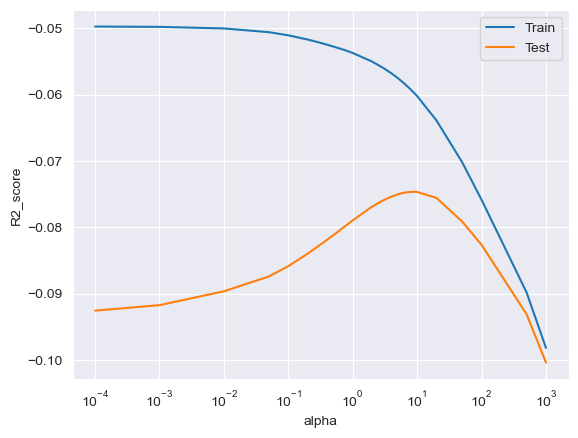

In [78]:
## Plotting R2 score vs alpha values
plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_train_score'], label='Train')
plt.plot(model_cv_results['param_alpha'], model_cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

- As the value of alpha increases, we see a decrease in train error and an initial increase followed by decrease in test error.
- From graph also, it is apparent that the optimal value of alpha is 9.0

### Model 2:  Lasso

In [79]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [81]:
## View the results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.09241934, 0.03225999, 0.01401019, 0.00995755, 0.00764842,
        0.00738187, 0.00564494, 0.0044868 , 0.00600157, 0.00475101,
        0.00441184, 0.00441823, 0.00448222, 0.00449748, 0.00444708,
        0.00554972, 0.00471082, 0.00446472, 0.00485277, 0.00441518,
        0.00667319, 0.00516706, 0.00593181, 0.00544205, 0.00466108,
        0.00462866, 0.00450225, 0.00457158]),
 'std_fit_time': array([7.09575523e-03, 1.36563239e-02, 4.67516567e-03, 8.63580214e-04,
        9.26522555e-04, 3.58855641e-03, 2.05199355e-03, 1.04017958e-04,
        1.49614333e-03, 2.26059208e-04, 8.75981916e-05, 1.65400961e-04,
        1.99474577e-04, 1.48187027e-04, 2.33106984e-04, 2.34534320e-03,
        7.08625110e-04, 7.37806854e-05, 9.21024642e-04, 9.46330885e-05,
        2.73352380e-03, 1.51176744e-03, 2.84872000e-03, 1.01164199e-03,
        9.43267788e-05, 5.09595940e-05, 6.28914409e-05, 4.84862973e-05]),
 'mean_score_time': array([0.00173001, 0.00178661, 0.00179143, 0.00174475, 

- Thus, we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.

In [82]:
# Create a ridge regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [83]:
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [84]:
## View the coefficients of lasso fitted model
lasso.coef_

array([-3.18424293e-05,  3.02529145e-03,  2.18053070e-02,  2.85439958e-02,
       -0.00000000e+00,  2.55716356e-02,  1.42183691e-03, -0.00000000e+00,
        4.24268690e-02, -0.00000000e+00,  1.10157660e-02,  0.00000000e+00,
        1.06082008e-01,  9.09952986e-03,  0.00000000e+00,  6.15056120e-03,
        1.00785016e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.38536574e-02,  1.93874301e-02,  1.91601356e-02,  1.12894777e-02,
        7.72471733e-03,  1.58767616e-03,  0.00000000e+00,  1.06846738e-02,
        0.00000000e+00,  0.00000000e+00, -7.57351426e-05, -5.16796090e-02,
        0.00000000e+00, -2.31044264e-03,  2.04982962e-03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  3.02337127e-02,
       -0.00000000e+00, -4.56966350e-02, -3.34920375e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.11835239e-03,  0.00000000e+00,
        0.00000000e+00, -3.67417850e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

In [85]:
## Make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [86]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.92
RSS (Train) = 11.27
RSS (Test) = 2.93
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


- Now, we will plot R2 Score against different values of alpha for both train and test sets¶


In [87]:
## Create a dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.092419      0.007096         0.001730        0.000054      0.0001   
1        0.032260      0.013656         0.001787        0.000119       0.001   
2        0.014010      0.004675         0.001791        0.000059        0.01   
3        0.009958      0.000864         0.001745        0.000039        0.05   
4        0.007648      0.000927         0.002360        0.001262         0.1   
5        0.007382      0.003589         0.001678        0.000045         0.2   
6        0.005645      0.002052         0.001726        0.000066         0.3   
7        0.004487      0.000104         0.001642        0.000048         0.4   
8        0.006002      0.001496         0.001722        0.000068         0.5   
9        0.004751      0.000226         0.001661        0.000024         0.6   
10       0.004412      0.000088         0.001618        0.000047         0.7   
11       0.004418      0.000165         0.002430        0.001149         0.8   
12       0.004482      0.000199         0.001657        0.000102         0.9   
13       0.004497      0.000148         0.001926        0.000587         1.0   
14       0.004447      0.000233         0.001788        0.000343         2.0   
15       0.005550      0.002345         0.001684        0.000037         3.0   
16       0.004711      0.000709         0.001665        0.000056         4.0   
17       0.004465      0.000074         0.001697        0.000035         5.0   
18       0.004853      0.000921         0.001677        0.000033         6.0   
19       0.004415      0.000095         0.001691        0.000022         7.0   
20       0.006673      0.002734         0.001719        0.000045         8.0   
21       0.005167      0.001512         0.001705        0.000080         9.0   
22       0.005932      0.002849         0.001677        0.000040        10.0   
23       0.005442      0.001012         0.001687        0.000016          20   
24       0.004661      0.000094         0.001705        0.000047          50   
25       0.004629      0.000051         0.001699        0.000052         100   
26       0.004502      0.000063         0.001652        0.000041         500   
27       0.004572      0.000048         0.001579        0.000083        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.069523          -0.081888   
1    {'alpha': 0.001}          -0.069445          -0.081681   
2     {'alpha': 0.01}          -0.091299          -0.110751   
3     {'alpha': 0.05}          -0.109268          -0.132709   
4      {'alpha': 0.1}          -0.144592          -0.168175   
5      {'alpha': 0.2}          -0.239648          -0.251524   
6      {'alpha': 0.3}          -0.274800          -0.286080   
7      {'alpha': 0.4}          -0.274800          -0.286080   
8      {'alpha': 0.5}          -0.274800          -0.286080   
9      {'alpha': 0.6}          -0.274800          -0.286080   
10     {'alpha': 0.7}          -0.274800          -0.286080   
11     {'alpha': 0.8}          -0.274800          -0.286080   
12     {'alpha': 0.9}          -0.274800          -0.286080   
13     {'alpha': 1.0}          -0.274800          -0.286080   
14     {'alpha': 2.0}          -0.274800          -0.286080   
15     {'alpha': 3.0}          -0.274800          -0.286080   
16     {'alpha': 4.0}          -0.274800          -0.286080   
17     {'alpha': 5.0}          -0.274800          -0.286080   
18     {'alpha': 6.0}          -0.274800          -0.286080   
19     {'alpha': 7.0}          -0.274800          -0.286080   
20     {'alpha': 8.0}          -0.274800          -0.286080   
21     {'alpha': 9.0}          -0.274800          -0.286080   
22    {'alpha': 10.0}          -0.274800          -0.286080   
23      {'alpha': 20}          -0.274800          -0.286080   
24      {'alpha': 50}          -0.274800          -0.286080   
25     {'alpha': 100}          -0.274800     

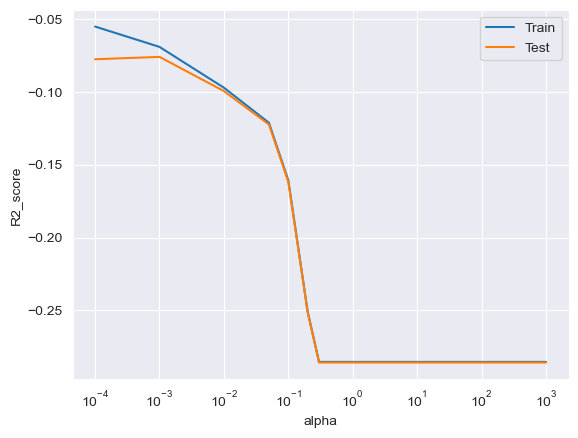

In [88]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

- As the value of alpha increases, we see a decrease in both train and test error.
- However, after a error value of approximately 0.05, error remains constant.

#### Comparing the two models 


In [89]:
## Setting float display options
pd.options.display.float_format = "{:,.2f}".format


In [90]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

Ridge Regression  Lasso Regression
Metric                                              
R2 Score (Train)              0.94              0.92
R2 Score (Test)               0.93              0.92
RSS (Train)                   8.56             11.27
RSS (Test)                    2.83              2.93
MSE (Train)                   0.01              0.01
MSE (Test)                    0.01              0.01
RMSE (Train)                  0.09              0.10
RMSE (Test)                   0.10              0.10

- The R2 score on test data is 0.93 & 0.92 for both Ridge Regression and Lasso models.

In [91]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

Empty DataFrame
Columns: []
Index: [Id, LotFrontage, LotArea, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, Age, MSSubClass_1-1/2 STORY FINISHED ALL AGES, MSSubClass_1-STORY 1945 & OLDER, MSSubClass_1-STORY 1946 & NEWER ALL STYLES, MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER, MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES, MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES, MSSubClass_2-1/2 STORY ALL AGES, MSSubClass_2-STORY 1945 & OLDER, MSSubClass_2-STORY 1946 & NEWER, MSSubClass_2-STORY PUD - 1946 & NEWER, MSSubClass_DUPLEX - ALL STYLES AND AGES, MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER, MSSubClass_SPLIT FOYER, MSSubClass_SPLIT OR MULTI-LEVEL, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, LotShape_IR2, LotShape_IR3, LotShape_Reg, LandContour_HLS, LandContour_Low, LandContour_Lvl, Utilities_NoSeWa, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, Neighborhood_SawyerW, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Timber, Neighborhood_Veenker, Condition1_Feedr, Condition1_Norm, Condition1_PosA, Condition1_PosN, Condition1_RRAe, Condition1_RRAn, Condition1_RRNe, Condition1_RRNn, Condition2_Feedr, Condition2_Norm, Condition2_PosA, Condition2_PosN, ...]

In [92]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [93]:
## View the betas/coefficients
betas 

Ridge  Lasso
Id                                                  -0.00  -0.00
LotFrontage                                          0.01   0.00
LotArea                                              0.02   0.02
YearRemodAdd                                         0.02   0.03
MasVnrArea                                           0.00  -0.00
BsmtFinSF1                                           0.01   0.03
BsmtFinSF2                                          -0.00   0.00
BsmtUnfSF                                           -0.02  -0.00
TotalBsmtSF                                          0.05   0.04
1stFlrSF                                             0.01  -0.00
2ndFlrSF                                             0.03   0.01
LowQualFinSF                                         0.00   0.00
GrLivArea                                            0.09   0.11
BsmtFullBath                                         0.01   0.01
BsmtHalfBath                                        -0.00   0.00
FullBath                                             0.01   0.01
HalfBath                                             0.01   0.01
BedroomAbvGr                                         0.00   0.00
KitchenAbvGr                                         0.00   0.00
TotRmsAbvGrd                                         0.00  -0.00
Fireplaces                                           0.02   0.02
GarageCars                                           0.02   0.02
GarageArea                                           0.02   0.02
WoodDeckSF                                           0.01   0.01
OpenPorchSF                                          0.01   0.01
EnclosedPorch                                        0.00   0.00
3SsnPorch                                            0.00   0.00
ScreenPorch                                          0.01   0.01
PoolArea                                             0.00   0.00
MiscVal                                              0.00   0.00
MoSold                                              -0.00  -0.00
Age                                                 -0.05  -0.05
MSSubClass_1-1/2 STORY FINISHED ALL AGES            -0.00   0.00
MSSubClass_1-STORY 1945 & OLDER                     -0.03  -0.00
MSSubClass_1-STORY 1946 & NEWER ALL STYLES           0.02   0.00
MSSubClass_1-STORY PUD (Planned Unit Developmen...   0.02   0.00
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES         0.01   0.00
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND...  -0.02  -0.00
MSSubClass_2-1/2 STORY ALL AGES                      0.03   0.00
MSSubClass_2-STORY 1945 & OLDER                      0.04   0.03
MSSubClass_2-STORY 1946 & NEWER                     -0.00  -0.00
MSSubClass_2-STORY PUD - 1946 & NEWER               -0.05  -0.05
MSSubClass_DUPLEX - ALL STYLES AND AGES             -0.03  -0.03
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  -0.01  -0.00
MSSubClass_SPLIT FOYER                               0.01   0.00
MSSubClass_SPLIT OR MULTI-LEVEL                      0.00   0.00
MSZoning_FV                                          0.04   0.00
MSZoning_RH                                          0.02   0.00
MSZoning_RL                                          0.01   0.00
MSZoning_RM                                         -0.02  -0.04
Street_Pave                                         -0.01  -0.00
LotShape_IR2                                         0.01   0.00
LotShape_IR3                                        -0.03  -0.00
LotShape_Reg                                         0.00  -0.00
LandContour_HLS                                      0.04   0.00
LandContour_Low                                      0.01   0.00
LandContour_Lvl                                      0.01  -0.00
Utilities_NoSeWa                                    -0.01  -0.00
LotConfig_CulDSac                                    0.03   0.02
LotConfig_FR2                                       -0.02  -0.00
LotConfig_FR3                                       -0.00  -0.00
LotConfig_Inside      

In [94]:
## View the features removed by Lasso
betas[betas['Lasso']==0]

Ridge  Lasso
MasVnrArea                                           0.00  -0.00
BsmtUnfSF                                           -0.02  -0.00
1stFlrSF                                             0.01  -0.00
LowQualFinSF                                         0.00   0.00
BsmtHalfBath                                        -0.00   0.00
BedroomAbvGr                                         0.00   0.00
KitchenAbvGr                                         0.00   0.00
TotRmsAbvGrd                                         0.00  -0.00
3SsnPorch                                            0.00   0.00
PoolArea                                             0.00   0.00
MiscVal                                              0.00   0.00
MSSubClass_1-1/2 STORY FINISHED ALL AGES            -0.00   0.00
MSSubClass_1-STORY PUD (Planned Unit Developmen...   0.02   0.00
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES         0.01   0.00
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND...  -0.02  -0.00
MSSubClass_2-1/2 STORY ALL AGES                      0.03   0.00
MSSubClass_2-STORY 1946 & NEWER                     -0.00  -0.00
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  -0.01  -0.00
MSSubClass_SPLIT FOYER                               0.01   0.00
MSSubClass_SPLIT OR MULTI-LEVEL                      0.00   0.00
MSZoning_RH                                          0.02   0.00
MSZoning_RL                                          0.01   0.00
Street_Pave                                         -0.01  -0.00
LotShape_IR2                                         0.01   0.00
LotShape_IR3                                        -0.03  -0.00
LandContour_Low                                      0.01   0.00
LandContour_Lvl                                      0.01  -0.00
Utilities_NoSeWa                                    -0.01  -0.00
LotConfig_FR2                                       -0.02  -0.00
LotConfig_FR3                                       -0.00  -0.00
LotConfig_Inside                                    -0.00   0.00
LandSlope_Mod                                       -0.00   0.00
LandSlope_Sev                                        0.04   0.00
Neighborhood_Blueste                                -0.01  -0.00
Neighborhood_BrDale                                 -0.00  -0.00
Neighborhood_CollgCr                                -0.02  -0.00
Neighborhood_Gilbert                                -0.01  -0.00
Neighborhood_IDOTRR                                  0.01   0.00
Neighborhood_Mitchel                                -0.04  -0.00
Neighborhood_NAmes                                  -0.03  -0.00
Neighborhood_NPkVill                                 0.01   0.00
Neighborhood_NWAmes                                 -0.02  -0.00
Neighborhood_NoRidge                                 0.01  -0.00
Neighborhood_SWISU                                   0.01   0.00
Neighborhood_Sawyer                                 -0.02  -0.00
Neighborhood_SawyerW                                -0.02  -0.00
Neighborhood_Timber                                  0.01   0.00
Neighborhood_Veenker                                 0.02   0.00
Condition1_Feedr                                    -0.00  -0.00
Condition1_PosA                                      0.01   0.00
Condition1_PosN                                      0.02   0.00
Condition1_RRAe                                     -0.03  -0.00
Condition1_RRAn                                      0.01   0.00
Condition1_RRNe                                      0.00   0.00
Condition1_RRNn                                      0.02   0.00
Condition2_Feedr                                    -0.01  -0.00
Condition2_Norm                                      0.03   0.00
Condition2_PosA                                      0.04   0.00
Condition2_PosN                                     -0.03  -0.00
Condition2_RRAe                                     -0.00  -0.00
Condition2_RRAn                                     -0.01  -0.00
Condition2_RRNn       

In [95]:
## View the number of features removed by lasso
betas[betas['Lasso']==0].shape

(282, 2)

- The above 282 features have been removed by Lasso. In this way, lasso performs feature selection


#### Inferences for 'Surprise Housing

In [96]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               0.09
OverallQual_Excellent   0.09
OverallQual_Very Good   0.08
Neighborhood_Crawfor    0.08
Functional_Typ          0.07
OverallCond_Excellent   0.07
Exterior1st_BrkFace     0.07
SaleCondition_Alloca    0.07
CentralAir_Y            0.05
TotalBsmtSF             0.05
Name: Ridge, dtype: float64

In [97]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.10
OverallQual_Excellent   1.09
OverallQual_Very Good   1.09
Neighborhood_Crawfor    1.08
Functional_Typ          1.07
OverallCond_Excellent   1.07
Exterior1st_BrkFace     1.07
SaleCondition_Alloca    1.07
CentralAir_Y            1.05
TotalBsmtSF             1.05
Name: Ridge, dtype: float64

In [98]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_Excellent   0.12
GrLivArea               0.11
OverallQual_Very Good   0.10
Neighborhood_Crawfor    0.09
Exterior1st_BrkFace     0.08
Functional_Typ          0.08
CentralAir_Y            0.05
Neighborhood_Somerst    0.04
TotalBsmtSF             0.04
Condition1_Norm         0.04
Name: Lasso, dtype: float64

In [99]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_Excellent   1.13
GrLivArea               1.11
OverallQual_Very Good   1.11
Neighborhood_Crawfor    1.09
Exterior1st_BrkFace     1.08
Functional_Typ          1.08
CentralAir_Y            1.05
Neighborhood_Somerst    1.05
TotalBsmtSF             1.04
Condition1_Norm         1.04
Name: Lasso, dtype: float64

# STEP 4 : Inferences:


### The variables significant in predicting the price of a house are: -
- GrLivArea, 
- OverallQual_Excellent, 
- OverallQual_Very Good, 
- Neighborhood_Crawfor, 
- Functional_Typ, 
- OverallCond_Excellent, 
- Exterior1st_BrkFace, 
- SaleCondition_Alloca, 
- CentralAir_Y, 
- TotalBsmtSF


### How well those variables describe the price of a house?
Here will see only top few variables

<span style="color: red; font-size: 18px;"> GrLivArea: <span style="color: green; font-size: 15px;"> An increase of 1 square foot of house area above ground, the price will increase by 1.10 to 1.11 times <br>
<span style="color: red; font-size: 18px;"> OverallQual_Excellent & OverallQual_Very Good: <span style="color: green; font-size: 15px;"> if the overall material and finish of the house is Very Good or Excellent, the price of house will increase by 1.09 to 1.13 times <br>
<span style="color: red; font-size: 18px;"> Neighborhood_Crawfor: <span style="color: green; font-size: 15px;"> if Crawford is a nearby location, then the price of house will increase by 1.08 to 1.09 times <br>
<span style="color: red; font-size: 18px;"> Functional_Typ: <span style="color: green; font-size: 15px;"> if the home functionality is typical, then the price of house will increase by 1.07 to 1.08 times <br>
<span style="color: red; font-size: 18px;"> OverallCond_Excellent: <span style="color: green; font-size: 15px;"> if Overall Condition of the house is Excellent then rates will increase by 1.07 times <br>
<span style="color: red; font-size: 18px;"> Exterior1st_BrkFace: <span style="color: green; font-size: 15px;"> if the exterior covering on the house is Brick Face, the price of house will increase by 1.07 to 1.08 times. <br>
<span style="color: red; font-size: 18px;"> CentralAir_Y : <span style="color: green; font-size: 15px;"> If the home has Central air conditioning, then the price of house will increase by 1.05.<br>
<span style="color: red; font-size: 18px;"> SaleCondition - Allocation:<span style="color: green; font-size: 15px;">  two linked properties with separate deeds, typically condo with a garage unit house will increase by 1.07  times. <br>
<span style="color: red; font-size: 18px;"> TotalBsmtSF: <span style="color: green; font-size: 15px;"> if Total square feet of basement area of house is more then rates will increase from 1.04 to 1.05 times


### Determine the optimal value of lambda for ridge and lasso regression.

- Optimal value of lambda for Ridge Regression = 9
- Optimal value of lambda for Lasso = 0.001